In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
traffic_data= pd.read_csv(r"C:\Users\USER\Chameleon\MOP-Code\artificial-intelligence\Traffic Analysis\dataset\cleaned_merged_data.csv")
traffic_data

,date,road_name,location,suburb,speed_limit,direction,time,Light_Vehicles,Light_Vehicles_with_Trailer,Two_Axle_Trucks_Buses,...,status_id,seg_descr,poly_area,gisid,street_id,seg_part,Geo Shape x,Geo Shape y,Latitude,Longitude
0,2014-10-11,Wolseley Parade,North East Of Derby Street,Kensington,50,W,16:00,24.000000,0.386506,4.093996,...,2,Wolseley Parade between Bellair Street and Der...,5235,2301,1186,1,144.928291,-37.796994,-37.796238,144.929383
1,2014-10-11,Wolseley Parade,North East Of Derby Street,Kensington,50,W,17:00,42.000000,0.386506,4.093996,...,2,Wolseley Parade between Bellair Street and Der...,5235,2301,1186,1,144.928291,-37.796994,-37.796238,144.929383
2,2014-10-11,Wolseley Parade,North East Of Derby Street,Kensington,50,W,18:00,33.000000,0.386506,1.000000,...,2,Wolseley Parade between Bellair Street and Der...,5235,2301,1186,1,144.928291,-37.796994,-37.796238,144.929383
3,2014-11-11,Wolseley Parade,North East Of Derby Street,Kensington,50,W,2:00,3.000000,0.386506,4.093996,...,2,Wolseley Parade between Bellair Street and Der...,5235,2301,1186,1,144.928291,-37.796994,-37.796238,144.929383
4,2014-11-11,Wolseley Parade,North East Of Derby Street,Kensington,50,W,4:00,86.177384,0.386506,4.093996,...,2,Wolseley Parade between Bellair Street and Der...,5235,2301,1186,1,144.928291,-37.796994,-37.796238,144.929383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63115,2014-11-13,Tennyson Street,South West Of Southey Street,Kensington,50,W,12:00,4.000000,0.386506,1.000000,...,2,Tennyson Street between Southey Street and Ard...,1574,2289,1119,1,144.930478,-37.797832,-37.798036,144.929982
63116,2014-11-13,Tennyson Street,South West Of Southey Street,Kensington,50,W,13:00,6.000000,0.386506,4.093996,...,2,Tennyson Street between Southey Street and Ard...,1574,2289,1119,1,144.930478,-37.797832,-37.798036,144.929982
63117,2014-11-13,Tennyson Street,South West Of Southey Street,Kensington,50,W,14:00,6.000000,0.386506,1.000000,...,2,Tennyson Street between Southey Street and Ard...,1574,2289,1119,1,144.930478,-37.797832,-37.798036,144.929982
63118,2014-11-13,Tennyson Street,South West Of Southey Street,Kensington,50,W,16:00,8.000000,0.386506,1.000000,...,2,Tennyson Street between Southey Street and Ard...,1574,2289,1119,1,144.930478,-37.797832,-37.798036,144.929982


In [159]:
# List all the columns in the dataset
traffic_data.columns.tolist()

['date',
 'road_name',
 'location',
 'suburb',
 'speed_limit',
 'direction',
 'time',
 'Light_Vehicles',
 'Light_Vehicles_with_Trailer',
 'Two_Axle_Trucks_Buses',
 'Three_Axle_Trucks_Buses',
 'Four_Axle_Trucks',
 'Three_Axle_Articulated_Vehicles',
 'Four_Axle_Articulated_Vehicles',
 'Five_Axle_Articulated_Vehicles',
 'Six_Axle_Articulated_Vehicles',
 'B_Double_Trucks',
 'Double_Road_Trains',
 'Triple_Road_Trains',
 'Unknown_Vehicles',
 'Motorcycles',
 'Bicycles',
 'average_speed',
 '85th_percentile_speed',
 'maximum_speed',
 'road_segment',
 'seg_id',
 'str_type',
 'dtupdate',
 'status_id',
 'seg_descr',
 'poly_area',
 'gisid',
 'street_id',
 'seg_part',
 'Geo Shape x',
 'Geo Shape y',
 'Latitude',
 'Longitude']

In [161]:

# Convert 'date' and 'time' to datetime and combine them
traffic_data['datetime'] = pd.to_datetime(traffic_data['date'] + ' ' + traffic_data['time'])

traffic_data.drop(columns=['date', 'time'], inplace=True)

In [163]:
# Extract additional time-based features
traffic_data['hour'] = traffic_data['datetime'].dt.hour
traffic_data['day_of_week'] = traffic_data['datetime'].dt.dayofweek
traffic_data['week'] = traffic_data['datetime'].dt.isocalendar().week
traffic_data['year'] = traffic_data['datetime'].dt.year

In [165]:
# Encoding categorical variables
traffic_data['road_name_encoded'] = traffic_data['road_name'].astype('category').cat.codes
traffic_data['location_encoded'] = traffic_data['location'].astype('category').cat.codes
traffic_data['suburb_encoded'] = traffic_data['suburb'].astype('category').cat.codes

In [167]:
# Text Standardization
columns_to_standardize = ['road_name', 'location', 'suburb']
for col in columns_to_standardize:
    traffic_data[col] = traffic_data[col].str.lower().str.strip().str.title()

In [169]:
traffic_data.head()

,road_name,location,suburb,speed_limit,direction,Light_Vehicles,Light_Vehicles_with_Trailer,Two_Axle_Trucks_Buses,Three_Axle_Trucks_Buses,Four_Axle_Trucks,...,Latitude,Longitude,datetime,hour,day_of_week,week,year,road_name_encoded,location_encoded,suburb_encoded
0,Wolseley Parade,North East Of Derby Street,Kensington,50,W,24.000000,0.386506,4.093996,0.608382,0.260623,...,-37.796238,144.929383,2014-10-11 16:00:00,16,5,41,2014,107,103,4
1,Wolseley Parade,North East Of Derby Street,Kensington,50,W,42.000000,0.386506,4.093996,0.608382,0.260623,...,-37.796238,144.929383,2014-10-11 17:00:00,17,5,41,2014,107,103,4
2,Wolseley Parade,North East Of Derby Street,Kensington,50,W,33.000000,0.386506,1.000000,0.608382,0.260623,...,-37.796238,144.929383,2014-10-11 18:00:00,18,5,41,2014,107,103,4
3,Wolseley Parade,North East Of Derby Street,Kensington,50,W,3.000000,0.386506,4.093996,0.608382,0.260623,...,-37.796238,144.929383,2014-11-11 02:00:00,2,1,46,2014,107,103,4
4,Wolseley Parade,North East Of Derby Street,Kensington,50,W,86.177384,0.386506,4.093996,0.608382,0.260623,...,-37.796238,144.929383,2014-11-11 04:00:00,4,1,46,2014,107,103,4


In [171]:
# Outlier Removal
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [173]:
traffic_data['Total_Traffic_Volume'] = (
    traffic_data['Light_Vehicles'] +
    traffic_data['Light_Vehicles_with_Trailer'] +
    traffic_data['Two_Axle_Trucks_Buses'] +
    traffic_data['Three_Axle_Trucks_Buses'] +
    traffic_data['Four_Axle_Trucks'] +
    traffic_data['Three_Axle_Articulated_Vehicles'] +
    traffic_data['Four_Axle_Articulated_Vehicles'] +
    traffic_data['Five_Axle_Articulated_Vehicles'] +
    traffic_data['Six_Axle_Articulated_Vehicles'] +
    traffic_data['B_Double_Trucks'] +
    traffic_data['Double_Road_Trains'] +
    traffic_data['Triple_Road_Trains'] +
    traffic_data['Unknown_Vehicles'] +
    traffic_data['Motorcycles'] +
    traffic_data['Bicycles']
)

In [175]:
# Aggregate data by date
daily_traffic = traffic_data.groupby('datetime').sum().reset_index()
#Combine all light vehicles into one category
light_vehicle_columns= ['Light_Vehicles', 'Light_Vehicles_with_Trailer']
# Combine all heavy vehicles into one category
heavy_vehicle_columns = [
    'Two_Axle_Trucks_Buses', 'Three_Axle_Trucks_Buses', 'Four_Axle_Trucks',
    'Three_Axle_Articulated_Vehicles', 'Four_Axle_Articulated_Vehicles',
    'Five_Axle_Articulated_Vehicles', 'Six_Axle_Articulated_Vehicles',
    'B_Double_Trucks', 'Double_Road_Trains', 'Triple_Road_Trains'
]
daily_traffic['Light_Vehicles'] = daily_traffic[light_vehicle_columns].sum(axis=1)
# Aggregate the heavy vehicles into a single column
daily_traffic['Heavy_Vehicles'] = daily_traffic[heavy_vehicle_columns].sum(axis=1)
daily_traffic['Total_Traffic_Volume'] = (
    daily_traffic['Light_Vehicles'] +
    daily_traffic['Heavy_Vehicles'] +
    daily_traffic['Unknown_Vehicles'] +
    daily_traffic['Motorcycles'] +
    daily_traffic['Bicycles']
)
# Update the dataframe to include only relevant columns
daily_traffic = daily_traffic[['datetime', 'Light_Vehicles', 'Heavy_Vehicles', 'Unknown_Vehicles', 'Motorcycles',
                               'Bicycles', 'Total_Traffic_Volume']]
daily_traffic

,datetime,Light_Vehicles,Heavy_Vehicles,Unknown_Vehicles,Motorcycles,Bicycles,Total_Traffic_Volume
0,2014-01-06 00:00:00,16.773012,10.524577,0.270581,2.348956,6.667232,36.584358
1,2014-01-06 01:00:00,24.773012,10.524577,0.270581,2.348956,6.667232,44.584358
2,2014-01-06 02:00:00,7.773012,10.524577,0.270581,2.348956,6.667232,27.584358
3,2014-01-06 03:00:00,7.773012,10.524577,0.270581,2.348956,6.667232,27.584358
4,2014-01-06 04:00:00,5.773012,10.524577,0.270581,2.348956,6.667232,25.584358
...,...,...,...,...,...,...,...
9691,2017-12-02 19:00:00,277.386506,13.384125,11.135290,2.174478,26.333616,330.414015
9692,2017-12-02 20:00:00,260.773012,6.467580,7.135290,4.174478,24.333616,302.883977
9693,2017-12-02 21:00:00,228.773012,15.655571,14.135290,2.174478,11.333616,272.071968
9694,2017-12-02 22:00:00,162.773012,15.561576,12.135290,4.174478,18.333616,212.977972


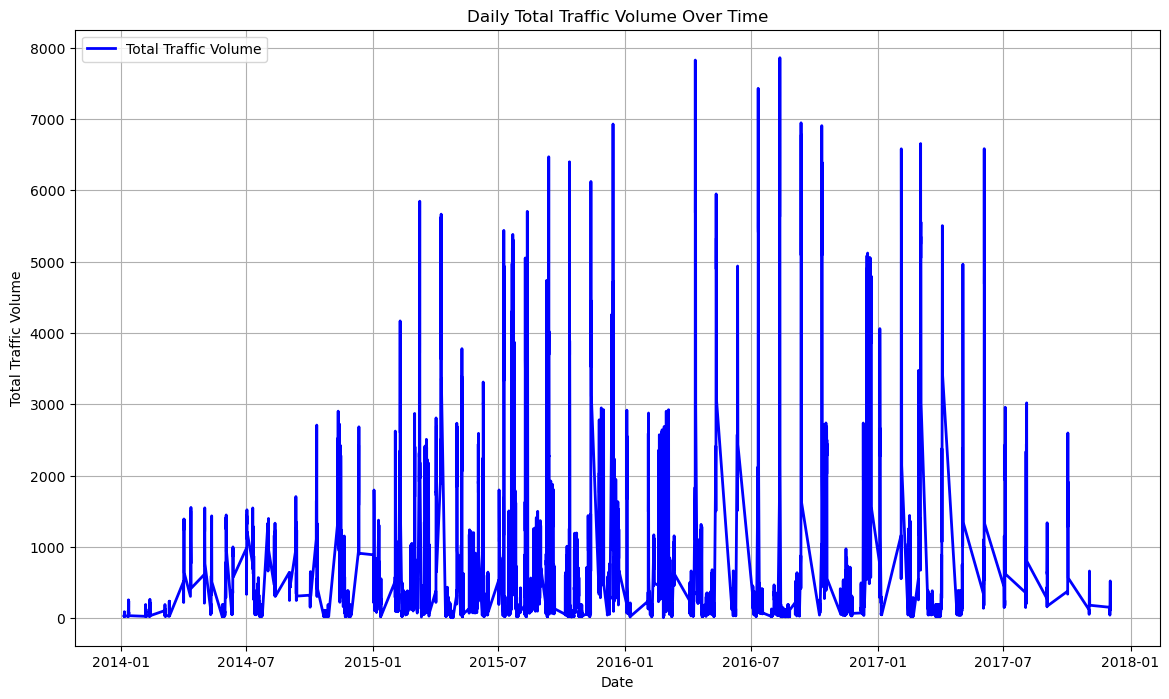

In [177]:
# Plot the total traffic volume only
plt.figure(figsize=(14, 8))
plt.plot(daily_traffic['datetime'], daily_traffic['Total_Traffic_Volume'], label='Total Traffic Volume', color='blue', linewidth=2)

plt.xlabel('Date')
plt.ylabel('Total Traffic Volume')
plt.title('Daily Total Traffic Volume Over Time')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


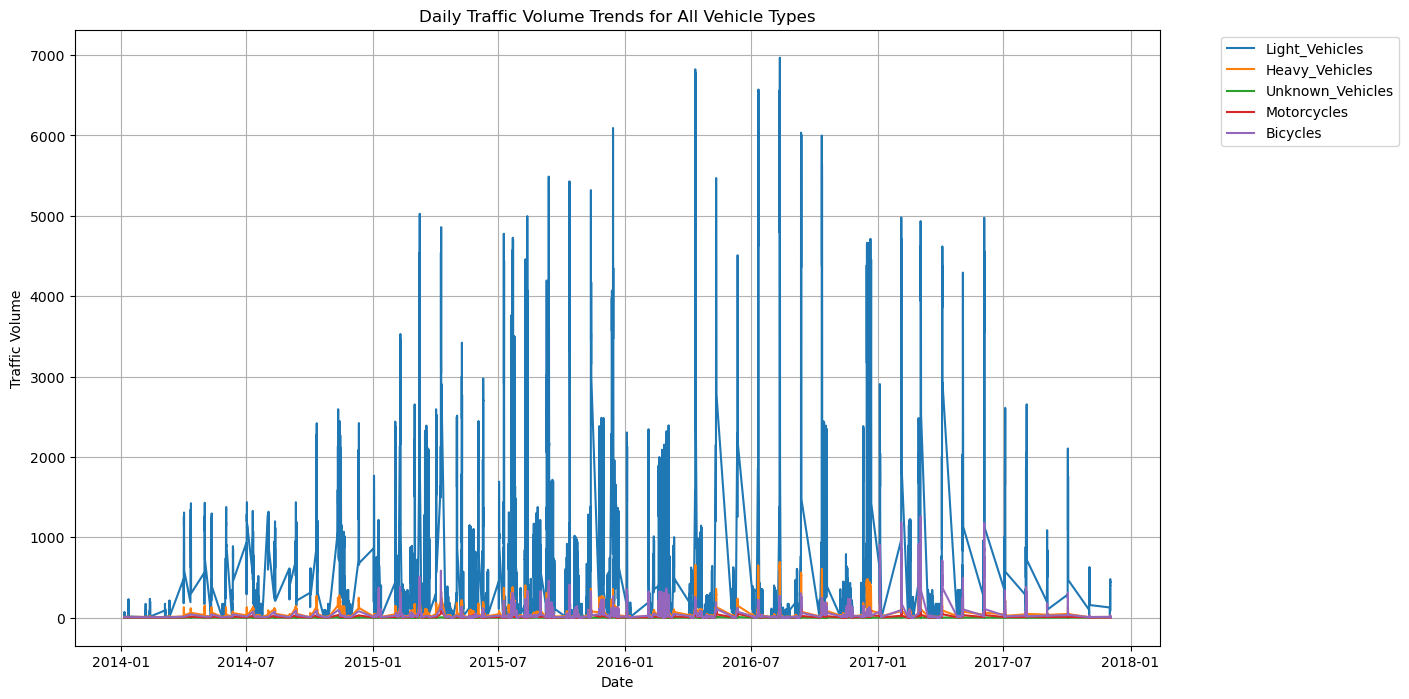

In [179]:
plt.figure(figsize=(14, 8))

for column in daily_traffic.columns[1:-1]:  # Skip the 'date' column
    plt.plot(daily_traffic['datetime'], daily_traffic[column], label=column)

plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.title('Daily Traffic Volume Trends for All Vehicle Types')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [181]:
# Identify the date with the most and least traffic volume
max_traffic_date = daily_traffic.loc[daily_traffic['Total_Traffic_Volume'].idxmax(), 'datetime']
min_traffic_date = daily_traffic.loc[daily_traffic['Total_Traffic_Volume'].idxmin(), 'datetime']

max_traffic_date, min_traffic_date


(Timestamp('2016-08-11 17:00:00'), Timestamp('2015-04-26 10:00:00'))

In [183]:
# Find the maximum and minimum values for each column (excluding 'datetime')
max_values = daily_traffic.iloc[:, 1:].max()
min_values = daily_traffic.iloc[:, 1:].min()

# Alternatively, if you only want to find max and min for Total_Traffic_Volume:
max_total_traffic = daily_traffic['Total_Traffic_Volume'].max()
min_total_traffic = daily_traffic['Total_Traffic_Volume'].min()

# Assign these to specific variables if needed
max_light_vehicles = daily_traffic['Light_Vehicles'].max()
min_light_vehicles = daily_traffic['Light_Vehicles'].min()

max_heavy_vehicles = daily_traffic['Heavy_Vehicles'].max()
min_heavy_vehicles = daily_traffic['Heavy_Vehicles'].min()

# You can print them or use them in further analysis
print("Max Total Traffic Volume:", max_total_traffic)
print("Min Total Traffic Volume:", min_total_traffic)



Max Total Traffic Volume: 7858.277010175868
Min Total Traffic Volume: 7.864567377941825


In [185]:
# Filter the data for the two specific dates
max_traffic_speed_data = traffic_data[traffic_data['datetime'] == max_traffic_date]
min_traffic_speed_data = traffic_data[traffic_data['datetime'] == min_traffic_date]

# Calculate the relevant speeding statistics for both dates
max_traffic_speed_stats = max_traffic_speed_data[['average_speed', '85th_percentile_speed', 'maximum_speed']].mean()
min_traffic_speed_stats = min_traffic_speed_data[['average_speed', '85th_percentile_speed', 'maximum_speed']].mean()

print("Stats of date with highest traffic volume: ", max_traffic_speed_stats)
print("Stats of date with lowest traffic volume: ", min_traffic_speed_stats)

Stats of date with highest traffic volume:  average_speed            31.782609
85th_percentile_speed    39.434783
maximum_speed            53.217391
dtype: float64
Stats of date with lowest traffic volume:  average_speed            38.0
85th_percentile_speed    40.0
maximum_speed            40.0
dtype: float64


In [187]:
# Calculate the relevant speeding statistics for both dates
max_traffic_speed_median_stats = max_traffic_speed_data[['average_speed', '85th_percentile_speed', 'maximum_speed']].median()
min_traffic_speed_median_stats = min_traffic_speed_data[['average_speed', '85th_percentile_speed', 'maximum_speed']].median()

print("Stats of date with highest traffic volume: ", max_traffic_speed_median_stats)
print("Stats of date with lowest traffic volume: ", min_traffic_speed_median_stats)

Stats of date with highest traffic volume:  average_speed            31.0
85th_percentile_speed    40.0
maximum_speed            50.0
dtype: float64
Stats of date with lowest traffic volume:  average_speed            38.0
85th_percentile_speed    40.0
maximum_speed            40.0
dtype: float64


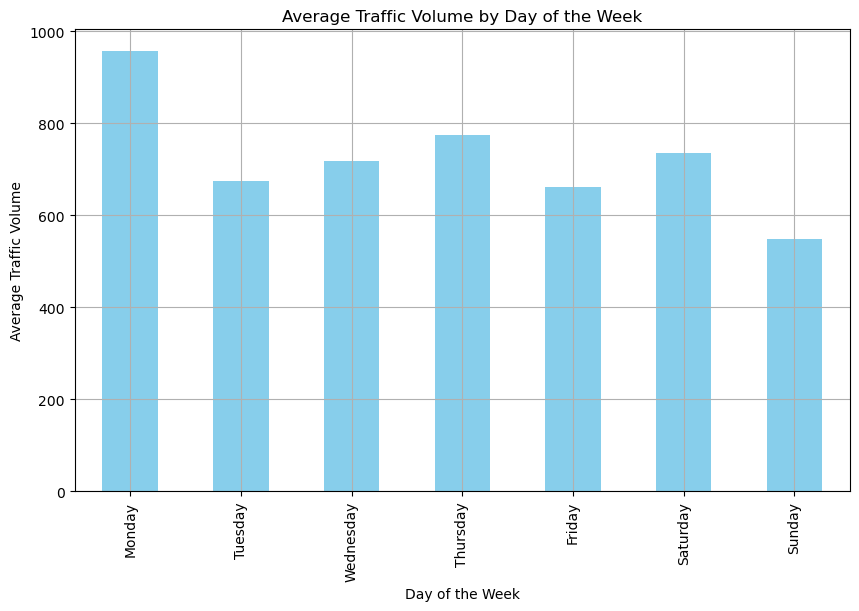

In [189]:
# Ensure the 'datetime' column is in datetime format
daily_traffic['datetime'] = pd.to_datetime(daily_traffic['datetime'])

# Set the 'datetime' column as the index
daily_traffic.set_index('datetime', inplace=True)

# Extract the day of the week
daily_traffic['day_of_week'] = daily_traffic.index.day_name()

# Group by 'day_of_week' and calculate the average total traffic volume
avg_traffic_by_day = daily_traffic.groupby('day_of_week')['Total_Traffic_Volume'].mean()

# Reorder the days of the week for meaningful results
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_traffic_by_day = avg_traffic_by_day.reindex(days_order)

# Plot the average traffic volume by day of the week
plt.figure(figsize=(10, 6))
avg_traffic_by_day.plot(kind='bar', color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Average Traffic Volume')
plt.title('Average Traffic Volume by Day of the Week')
plt.grid(True)
plt.show()


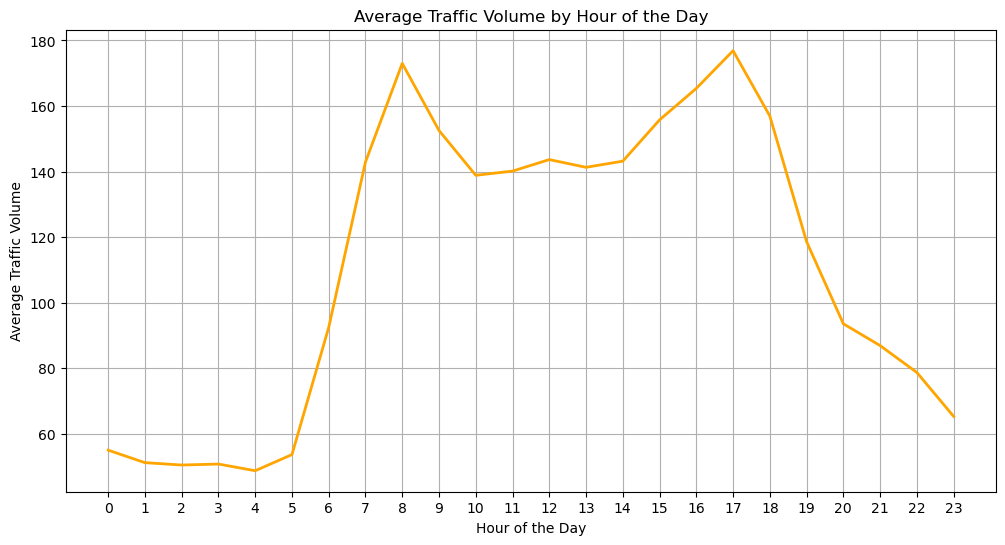

In [191]:
# Group by hour and calculate the mean traffic volume for each hour
avg_traffic_by_hour = traffic_data.groupby('hour')['Total_Traffic_Volume'].mean()

# Plotting the average traffic volume by hour of the day
plt.figure(figsize=(12, 6))
avg_traffic_by_hour.plot(kind='line', color='orange', linewidth=2)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Traffic Volume')
plt.title('Average Traffic Volume by Hour of the Day')
plt.grid(True)
plt.xticks(range(0, 24))  # Ensure all hours are displayed on the x-axis
plt.show()

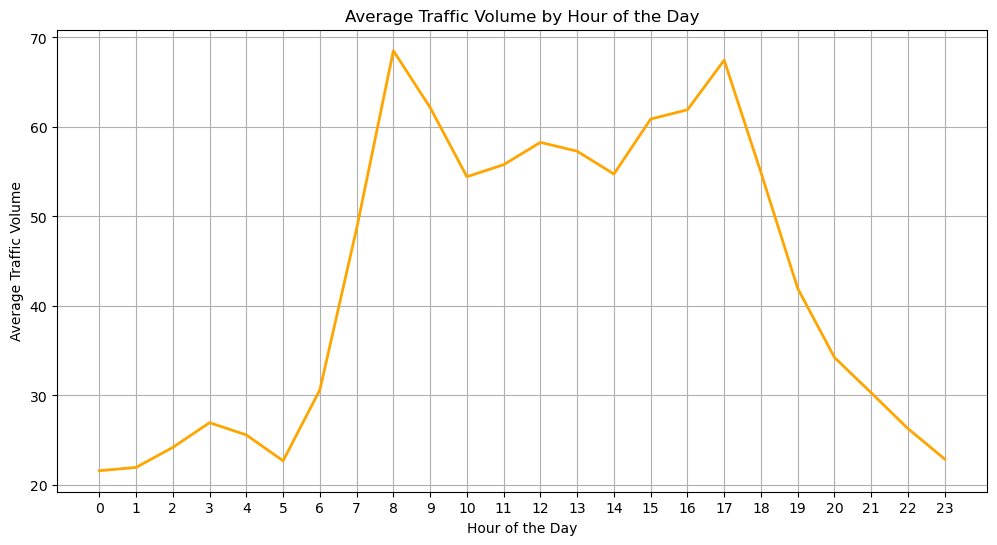

In [193]:

# Group by hour and calculate the mean traffic volume for each hour
avg_traffic_by_hour = traffic_data.groupby('hour')['Total_Traffic_Volume'].median()

# Plotting the average traffic volume by hour of the day
plt.figure(figsize=(12, 6))
avg_traffic_by_hour.plot(kind='line', color='orange', linewidth=2)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Traffic Volume')
plt.title('Average Traffic Volume by Hour of the Day')
plt.grid(True)
plt.xticks(range(0, 24))  # Ensure all hours are displayed on the x-axis
plt.show()


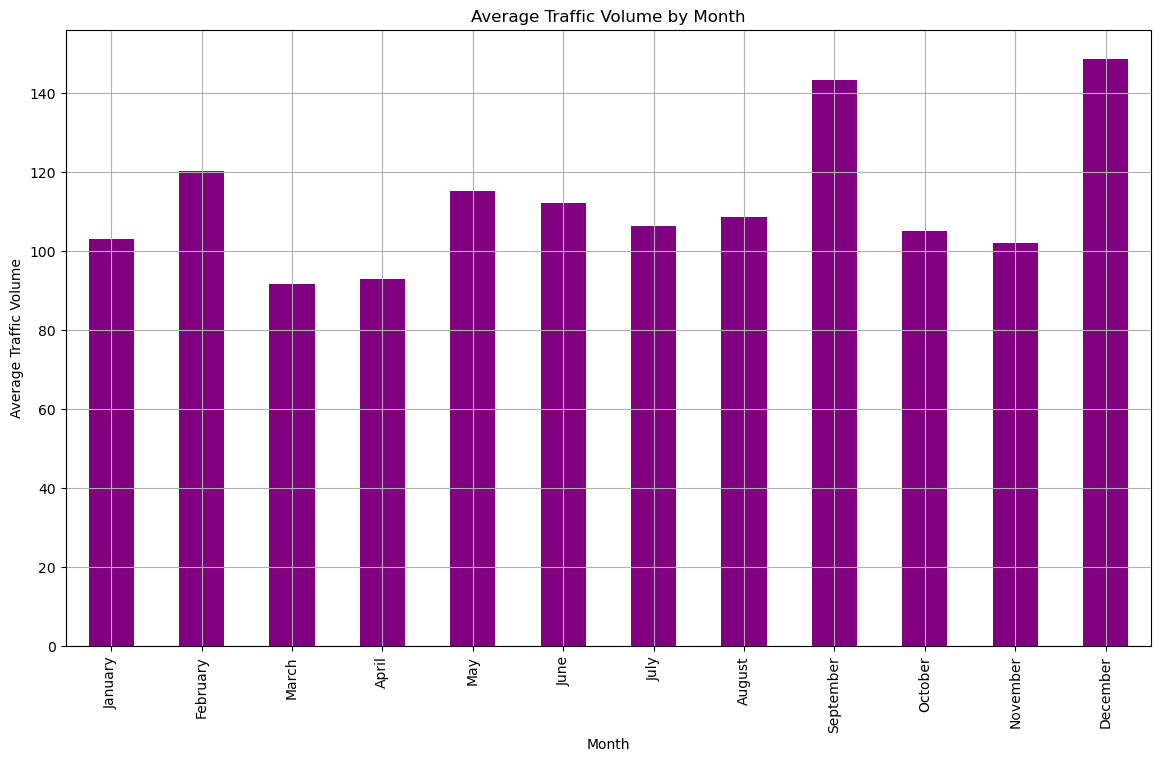

In [195]:


# Ensure the 'datetime' column is in datetime format
traffic_data['datetime'] = pd.to_datetime(traffic_data['datetime'])

# Extract the month and year from the datetime column
traffic_data['month'] = traffic_data['datetime'].dt.month
traffic_data['year'] = traffic_data['datetime'].dt.year

# Map the month numbers to month names
traffic_data['month_name'] = traffic_data['datetime'].dt.strftime('%B')

# Group by month name and year, and calculate the average traffic volume for each month
avg_traffic_by_month = traffic_data.groupby(['year', 'month_name'])['Total_Traffic_Volume'].mean()

# Reorder the months to be in chronological order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Plotting the average traffic volume by month with month names
plt.figure(figsize=(14, 8))
avg_traffic_by_month = avg_traffic_by_month.unstack().reindex(columns=month_order)
avg_traffic_by_month.mean().plot(kind='bar', color='purple')
plt.xlabel('Month')
plt.ylabel('Average Traffic Volume')
plt.title('Average Traffic Volume by Month')
plt.grid(True)
plt.show()


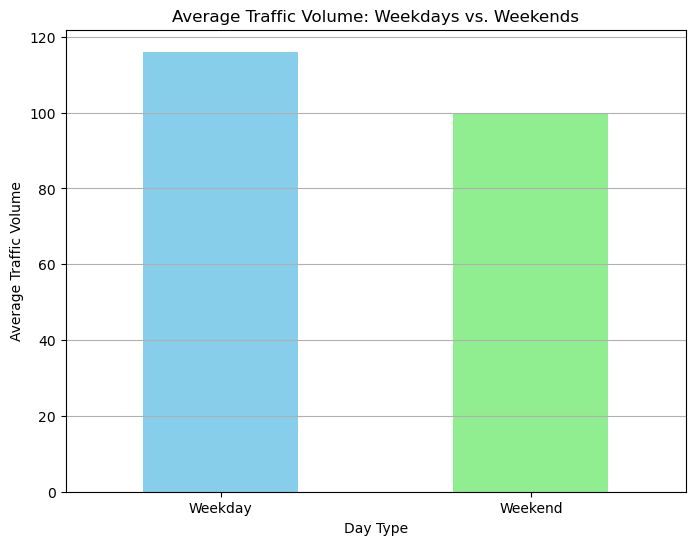

In [197]:

# Ensure the 'datetime' column is in datetime format
traffic_data['datetime'] = pd.to_datetime(traffic_data['datetime'])

# Extract the day of the week
traffic_data['day_of_week'] = traffic_data['datetime'].dt.day_name()

# Categorize into Weekdays and Weekends
traffic_data['day_type'] = traffic_data['day_of_week'].apply(
    lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday'
)

# Group by 'day_type' and calculate the average total traffic volume
avg_traffic_by_day_type = traffic_data.groupby('day_type')['Total_Traffic_Volume'].mean()

# Plot the bar chart
plt.figure(figsize=(8, 6))
avg_traffic_by_day_type.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.xlabel('Day Type')
plt.ylabel('Average Traffic Volume')
plt.title('Average Traffic Volume: Weekdays vs. Weekends')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


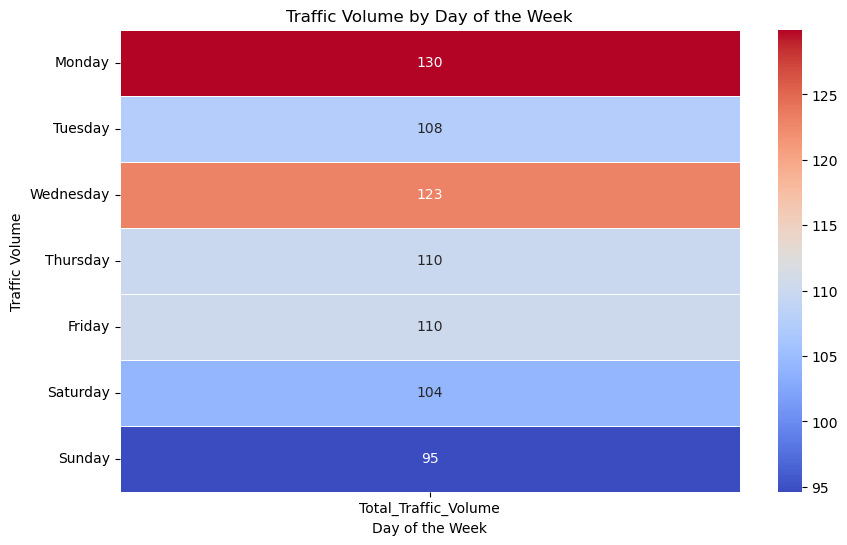

In [199]:
# Ensure the 'datetime' column is in datetime format
traffic_data['datetime'] = pd.to_datetime(traffic_data['datetime'])

# Extract the day of the week from the datetime column
traffic_data['day_of_week'] = traffic_data['datetime'].dt.day_name()

# Create a pivot table with days of the week as rows and traffic volume as values
traffic_by_day = traffic_data.pivot_table(values='Total_Traffic_Volume', index='day_of_week', aggfunc='mean')

# Reorder the days of the week to start from Monday
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
traffic_by_day = traffic_by_day.reindex(days_order)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(traffic_by_day, annot=True, fmt=".0f", cmap='coolwarm', linewidths=.5)
plt.title('Traffic Volume by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Traffic Volume')
plt.show()


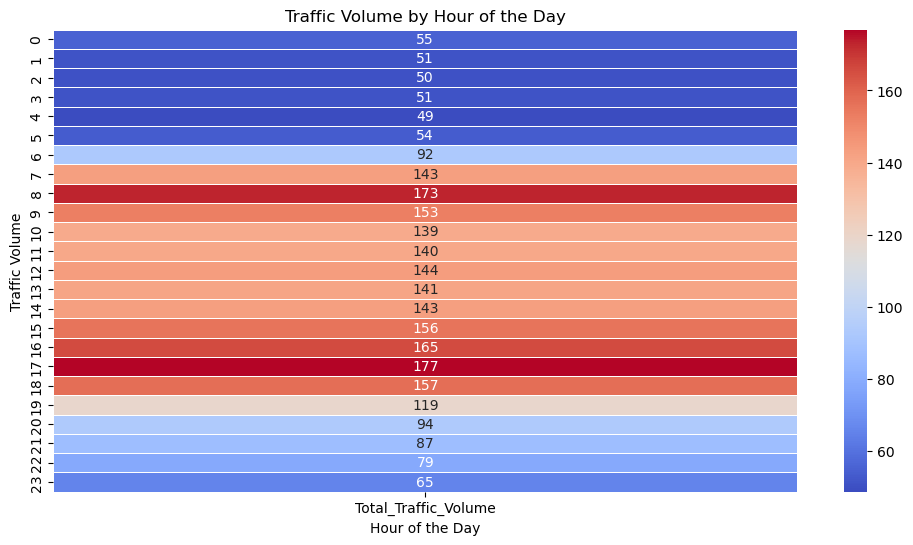

In [201]:
# Extract the hour from the datetime column
traffic_data['hour'] = traffic_data['datetime'].dt.hour

# Create a pivot table with hours as columns and traffic volume as values
traffic_by_hour = traffic_data.pivot_table(values='Total_Traffic_Volume', index='hour', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(traffic_by_hour, annot=True, fmt=".0f", cmap='coolwarm', linewidths=.5)
plt.title('Traffic Volume by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Traffic Volume')
plt.show()


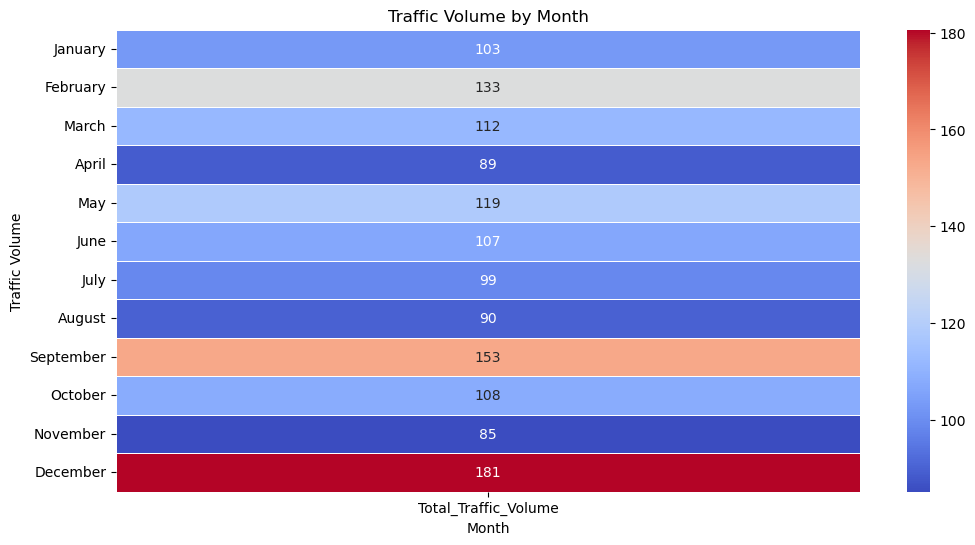

In [203]:
# Extract the month from the datetime column
traffic_data['month'] = traffic_data['datetime'].dt.month

# Map the month numbers to month names
traffic_data['month_name'] = traffic_data['datetime'].dt.strftime('%B')

# Create a pivot table with months as rows and traffic volume as values
traffic_by_month = traffic_data.pivot_table(values='Total_Traffic_Volume', index='month_name', aggfunc='mean')

# Reorder the months to be in chronological order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
traffic_by_month = traffic_by_month.reindex(month_order)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(traffic_by_month, annot=True, fmt=".0f", cmap='coolwarm', linewidths=.5)
plt.title('Traffic Volume by Month')
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.show()


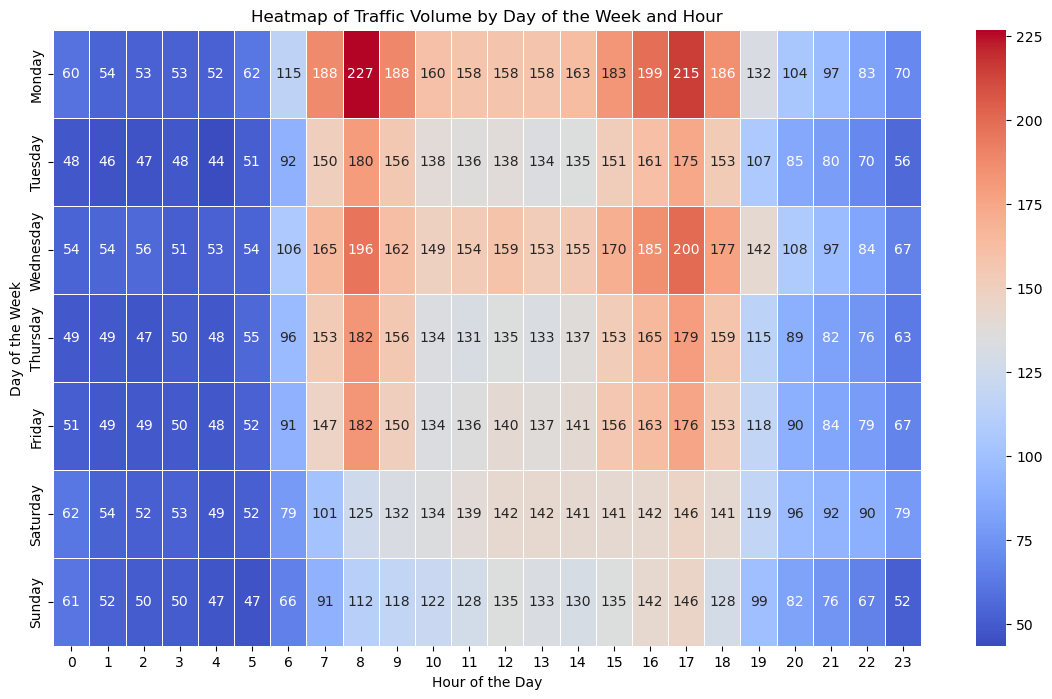

In [205]:


# Create a pivot table with days of the week as rows and hours as columns
traffic_pivot = traffic_data.pivot_table(values='Total_Traffic_Volume', index='day_of_week', columns='hour', aggfunc='mean')

# Reorder the days of the week to start from Monday
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
traffic_pivot = traffic_pivot.reindex(days_order)

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(traffic_pivot, annot=True, fmt=".0f", cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Traffic Volume by Day of the Week and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_28424\4039057655.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_data['day_of_week'] = traffic_data['datetime'].dt.dayofweek
C:\Users\USER\AppData\Local\Temp\ipykernel_28424\4039057655.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_data['month'] = traffic_data['datetime'].dt.month


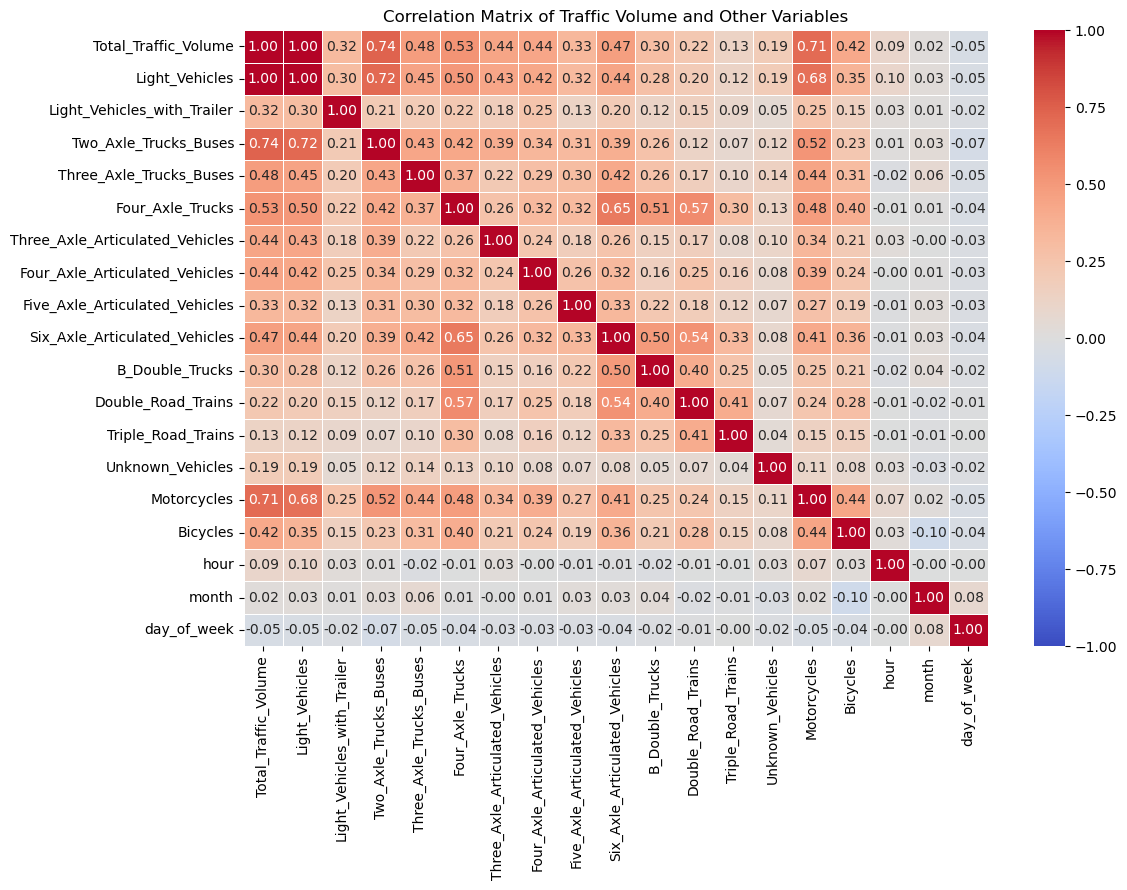

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt


# Here, we include 'Total_Traffic_Volume' and other variables of interest
columns_of_interest = [
    'Total_Traffic_Volume'
] + light_vehicle_columns + heavy_vehicle_columns + [
    'Unknown_Vehicles', 
    'Motorcycles', 
    'Bicycles', 
    'hour',  # Assuming hour of the day could influence traffic volume
    'month',  # Assuming month could influence traffic volume
    'day_of_week'  # If categorical data is encoded or day can be numerically meaningful
]
# Filter the dataframe to include only the columns of interest
correlation_data = traffic_data[columns_of_interest]

# Convert 'day_of_week' and 'month' to numerical values if they are categorical
correlation_data['day_of_week'] = traffic_data['datetime'].dt.dayofweek
correlation_data['month'] = traffic_data['datetime'].dt.month

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Traffic Volume and Other Variables')
plt.show()


In [209]:
road_segment_volume = traffic_data.groupby('road_segment').agg(
    Total_Volume=('Total_Traffic_Volume', 'sum'),
    road_name=('road_name', 'first'),
    location=('location', 'first'),
    suburb=('suburb', 'first'),
    speed_limit=('speed_limit', 'first'),
    direction=('direction', 'first'),
    seg_descr=('seg_descr', 'first'),
    Latitude=('Latitude', 'first'),
    Longitude=('Longitude', 'first')
).reset_index()
road_segment_volume

,road_segment,Total_Volume,road_name,location,suburb,speed_limit,direction,seg_descr,Latitude,Longitude
0,20036,16482.627626,Little Lonsdale Street,Between Exibition Street And Russell Street,Melbourne Cbd,40,E,Little Lonsdale Street between Exhibition Stre...,-37.809498,144.967958
1,20038,22572.053179,Little Lonsdale Street,Between Russell Street And Swanston Street,Melbourne Cbd,40,E,Little Lonsdale Street between Russell Street ...,-37.810214,144.965538
2,20042,16713.283715,Lt Lonsdale Street,Between Elizabeth Street And Queens Street,Melbourne Cbd,40,W,Little Lonsdale Street between Elizabeth Stree...,-37.811662,144.960565
3,20049,13311.123677,Little Bourke Street,Between Spring Street And Exibition Street,Melbourne Cbd,40,W,Little Bourke Street between Spring Street and...,-37.810749,144.971302
4,20051,20806.356837,Little Bourke Street,Between Exibition Street And Russell Street,Melbourne Cbd,40,W,Little Bourke Street between Exhibition Street...,-37.811465,144.968863
...,...,...,...,...,...,...,...,...,...,...
156,23100,55380.673070,Stubbs Street,Between Smith Street And Parsons Street.,Kensington,60,N,Stubbs Street between Scarborough Place and Sm...,-37.791552,144.935530
157,23101,51747.601995,Stubbs Street,North Of Robertson Street,Kensington,60,N,Stubbs Street between Smith Street and Roberts...,-37.792522,144.935348
158,23103,112127.475417,Stubbs Street,Between Macaulay Road And Robertson Street,Kensington,60,N,Stubbs Street between Robertson Street and Mac...,-37.794126,144.935045
159,23119,15898.444567,Buncle Street,Between Both Caylre Cresents At No Nth Bound E...,North Melbourne,50,N,Buncle Street between Macaulay Road and Caytre...,-37.794984,144.940176


In [211]:
# Aggregating the total volume by road name
road_name_volume = traffic_data.groupby('road_name').agg(
    Total_Traffic_Volume=('Total_Traffic_Volume', 'sum'),
    location=('location', 'first'),
    suburb=('suburb', 'first'),
    speed_limit=('speed_limit', 'first'),
    Latitude=('Latitude', 'first'),
    Longitude=('Longitude', 'first')
).reset_index()

# Sorting the road names by total traffic volume in descending order
high_traffic_roads = road_name_volume.sort_values(by='Total_Traffic_Volume', ascending=False)


high_traffic_roads


,road_name,Total_Traffic_Volume,location,suburb,speed_limit,Latitude,Longitude
91,Rathdowne Street,519335.025880,Between Victoria Street And Queensberry Street...,Carlton,40,-37.806252,144.969004
37,Gatehouse Street,406324.977067,Between Bayles Street And Park Drive,Parkville,40,-37.793037,144.955848
73,Macaulay Road,351926.003029,Between Bellair And Gower Streets,Kensington,60,-37.794474,144.930251
46,Harbour Esplanade,298323.225134,North Of Bourke Street,Docklands,40,-37.817074,144.945761
95,Spencer Street,283764.149522,Between Abbottsford Street And Hawke Street,West Melbourne,60,-37.806624,144.945904
...,...,...,...,...,...,...,...
107,Wolseley Parade,9031.621710,North East Of Derby Street,Kensington,50,-37.796238,144.929383
38,Geographe Street,8786.729252,South Of Bourke Street,Docklands,50,-37.820142,144.945395
83,O'Shannassy Street,8635.727895,Between Abbottsford Street And Curzon Street,North Melbourne,50,-37.799954,144.947332
20,Charles Street,5570.669320,Between Palmer Street And Wellington Parade,East Melbourne,50,-37.817205,144.981258


In [213]:


# Assuming `traffic_data` is already loaded and 'Total_Traffic_Volume' is calculated
suburb_volume = traffic_data.groupby('suburb').agg(
    Total_Traffic_Volume=('Total_Traffic_Volume', 'sum')
).reset_index()

# Sorting the suburbs by total traffic volume in descending order
high_traffic_suburbs = suburb_volume.sort_values(by='Total_Traffic_Volume', ascending=False)

# Formatting the Total_Traffic_Volume to display in standard notation
high_traffic_suburbs['Total_Traffic_Volume'] = high_traffic_suburbs['Total_Traffic_Volume'].apply(lambda x: f"{x:,.0f}")

# Display the formatted DataFrame
high_traffic_suburbs


,suburb,Total_Traffic_Volume
5,Melbourne Cbd,"1,238,293"
4,Kensington,"1,208,170"
6,North Melbourne,"1,145,121"
7,Parkville,"1,106,489"
0,Carlton,"753,978"
10,West Melbourne,"590,613"
2,Docklands,"436,011"
8,South Yarra,"308,096"
3,East Melbourne,"108,326"
9,Southbank,"99,657"


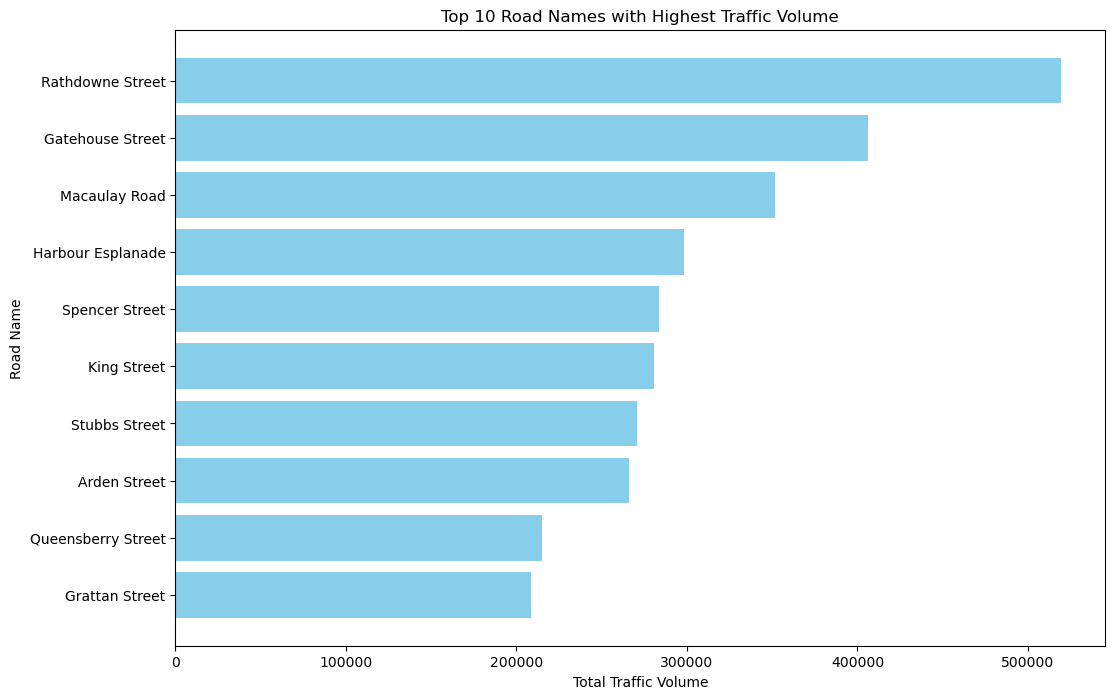

In [215]:
# Select the top 10 road names with the highest traffic volume
top_10_roads = high_traffic_roads.head(10)

# Plotting the data
plt.figure(figsize=(12, 8))
plt.barh(top_10_roads['road_name'], top_10_roads['Total_Traffic_Volume'], color='skyblue')
plt.xlabel('Total Traffic Volume')
plt.ylabel('Road Name')
plt.title('Top 10 Road Names with Highest Traffic Volume')
plt.gca().invert_yaxis()  # To have the highest traffic volume at the top
plt.show()

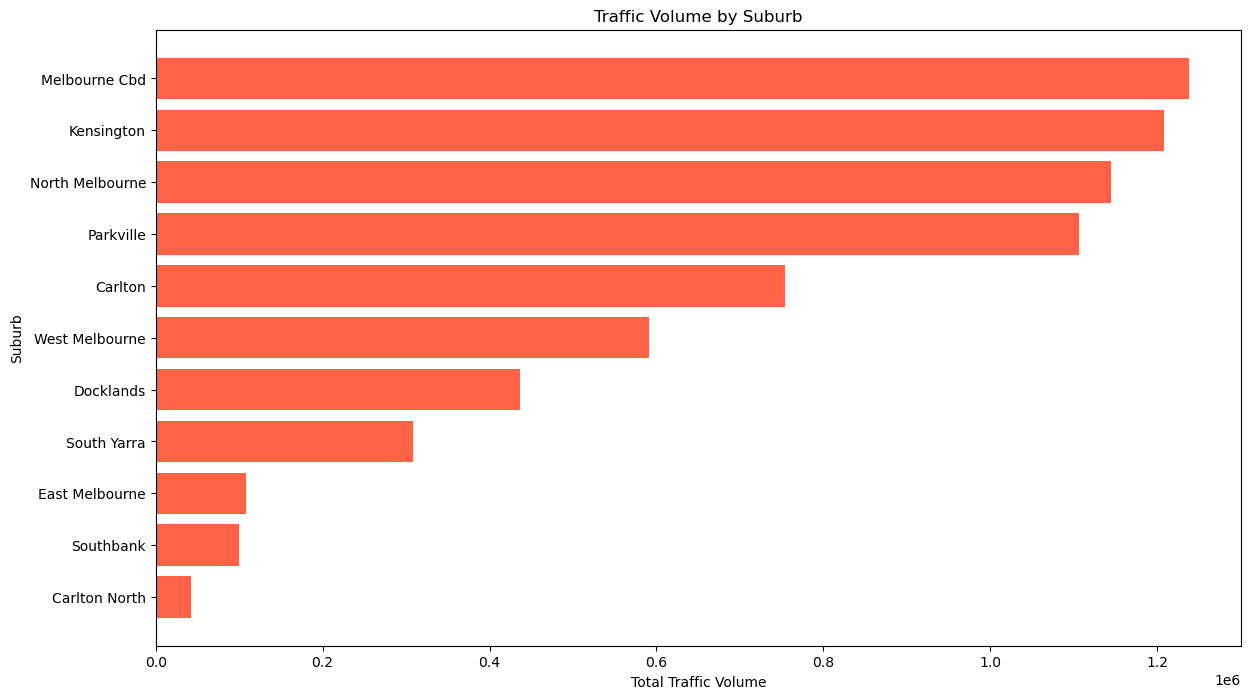

In [217]:
# Aggregating the total volume by suburb
suburb_volume = traffic_data.groupby('suburb').agg(
    Total_Traffic_Volume=('Total_Traffic_Volume', 'sum')
).reset_index()

# Sorting the suburbs by total traffic volume in descending order
high_traffic_suburbs = suburb_volume.sort_values(by='Total_Traffic_Volume', ascending=False)

# Plotting the traffic volume by suburb
plt.figure(figsize=(14, 8))
plt.barh(high_traffic_suburbs['suburb'], high_traffic_suburbs['Total_Traffic_Volume'], color='#FF6347')
plt.xlabel('Total Traffic Volume')
plt.ylabel('Suburb')
plt.title('Traffic Volume by Suburb')
plt.gca().invert_yaxis()  # To have the highest traffic volume at the top
plt.show()

In [219]:
# Calculate the speeding incidents
traffic_data['Speeding_Incident'] = traffic_data['maximum_speed'] > traffic_data['speed_limit']

# Count the total number of speeding incidents
total_speeding_incidents = traffic_data['Speeding_Incident'].sum()

In [221]:
# Group by road name to see where most speeding incidents happen based on average speed
speeding_by_road_name = traffic_data.groupby('road_name')['Speeding_Incident'].sum().reset_index()
# Sort to find the road names with the most speeding incidents based on average speed
speeding_by_road_name_sorted = speeding_by_road_name.sort_values(by='Speeding_Incident', ascending=False)
speeding_by_road_name_sorted.head(10)

,road_name,Speeding_Incident
37,Gatehouse Street,1670
85,Park Drive,1185
96,Story Street,1160
46,Harbour Esplanade,1116
4,Anderson Street,1108
89,Queensberry Street,811
6,Arden Street,763
91,Rathdowne Street,672
101,Victoria Street,655
104,Wells Place,642


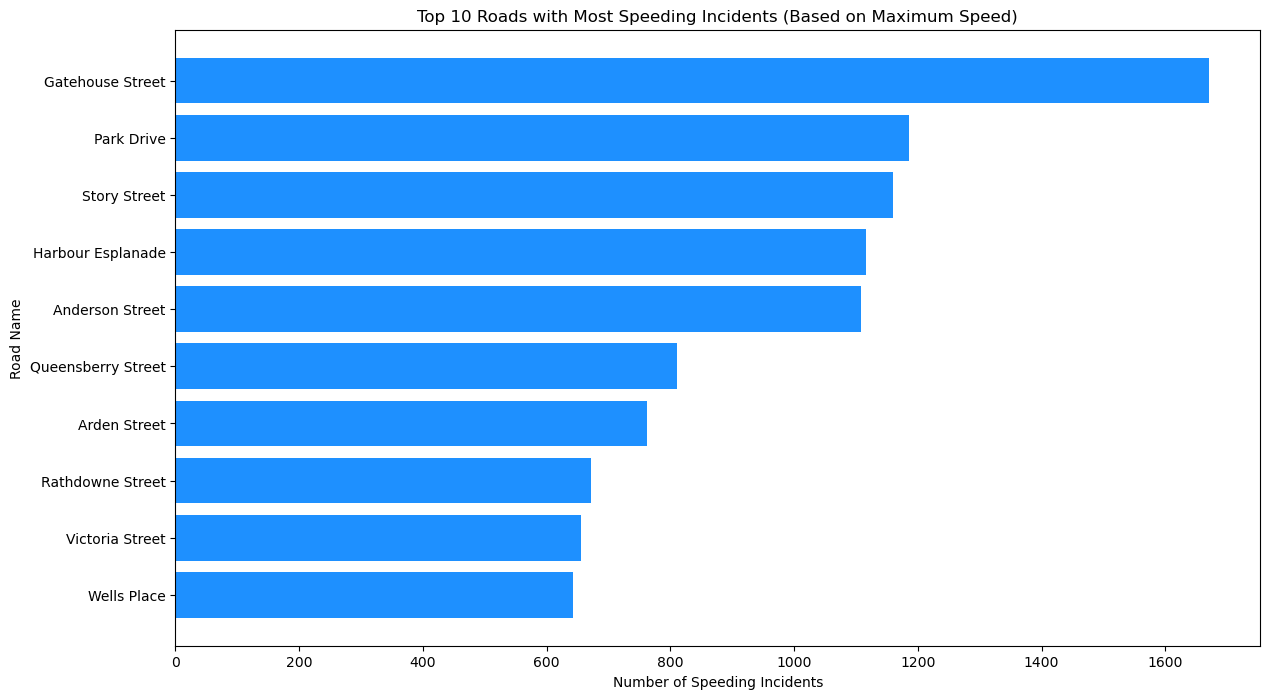

In [223]:
# Select the top 10 road names with the most speeding incidents
top_10_speeding_roads = speeding_by_road_name_sorted.head(10)

# Plotting the data
plt.figure(figsize=(14, 8))
plt.barh(top_10_speeding_roads['road_name'], top_10_speeding_roads['Speeding_Incident'], color='#1E90FF')  
plt.xlabel('Number of Speeding Incidents')
plt.ylabel('Road Name')
plt.title('Top 10 Roads with Most Speeding Incidents (Based on Maximum Speed)')
plt.gca().invert_yaxis()  # Highest value on top
plt.show()

In [225]:
# Group by suburb to see where most speeding incidents happen
speeding_by_suburb = traffic_data.groupby('suburb')['Speeding_Incident'].sum().reset_index()
# Sort to find the suburbs with the most speeding inCan cidents
speeding_by_suburb_sorted = speeding_by_suburb.sort_values(by='Speeding_Incident', ascending=False)
speeding_by_suburb_sorted

,suburb,Speeding_Incident
7,Parkville,6056
6,North Melbourne,5580
4,Kensington,3192
5,Melbourne Cbd,2565
8,South Yarra,2088
10,West Melbourne,2068
2,Docklands,1661
0,Carlton,1455
9,Southbank,645
3,East Melbourne,167


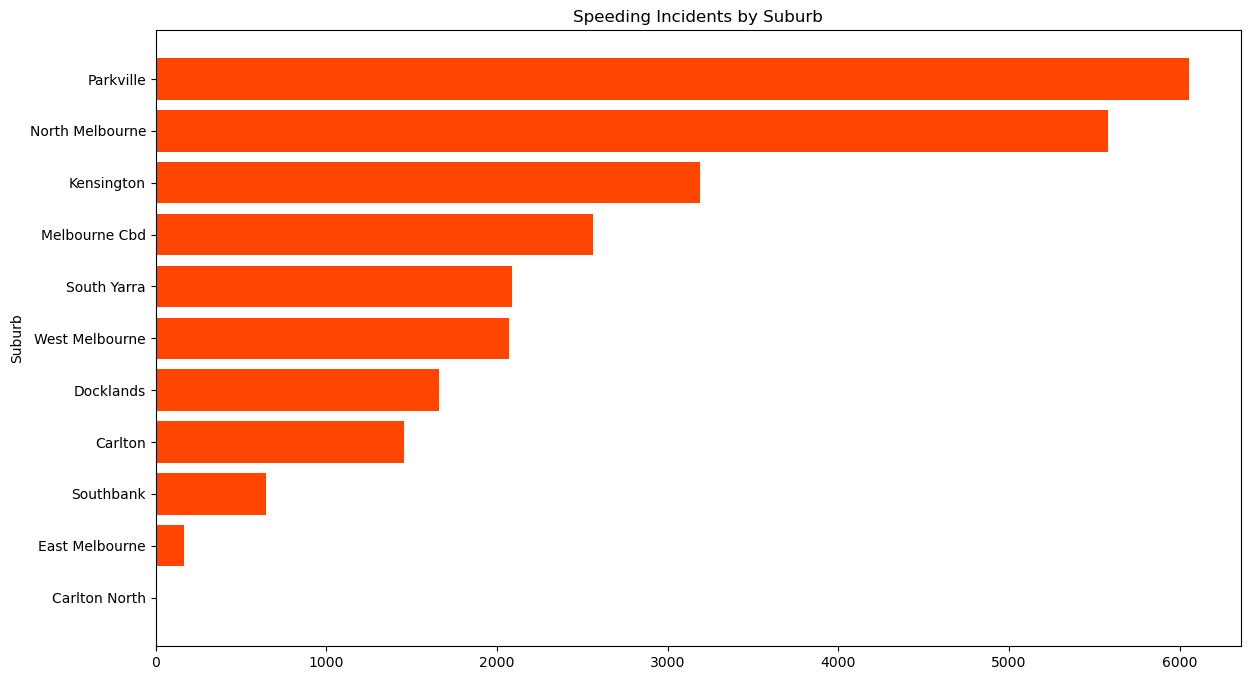

In [227]:
# Plotting the data
plt.figure(figsize=(14, 8))
plt.barh(speeding_by_suburb_sorted['suburb'], speeding_by_suburb_sorted['Speeding_Incident'], color='#FF4500') 
plt.ylabel('Suburb')
plt.title('Speeding Incidents by Suburb')
plt.gca().invert_yaxis()  # Highest value on top
plt.show()

In [229]:
# Calculate speeding incidents based on average_speed and assign to a new variable
traffic_data['Speeding_Incident_Avg_Speed'] = traffic_data['average_speed'] > traffic_data['speed_limit']

# Add this new variable to the DataFrame
total_speeding_incidents_avg = traffic_data['Speeding_Incident_Avg_Speed'].sum()

In [231]:

# Group by road name to see where most speeding incidents happen based on average speed
speeding_by_road_name_avg = traffic_data.groupby('road_name')['Speeding_Incident_Avg_Speed'].sum().reset_index()

# Sort to find the road names with the most speeding incidents based on average speed
speeding_by_road_name_avg_sorted = speeding_by_road_name_avg.sort_values(by='Speeding_Incident_Avg_Speed', ascending=False)

# Display the sorted data
speeding_by_road_name_avg_sorted.head(10)

,road_name,Speeding_Incident_Avg_Speed
37,Gatehouse Street,564
104,Wells Place,468
4,Anderson Street,407
91,Rathdowne Street,353
73,Macaulay Road,280
97,Stubbs Street,214
58,Kirrip Crescent,150
56,Kensington Road,135
29,Epsom Road,125
89,Queensberry Street,97


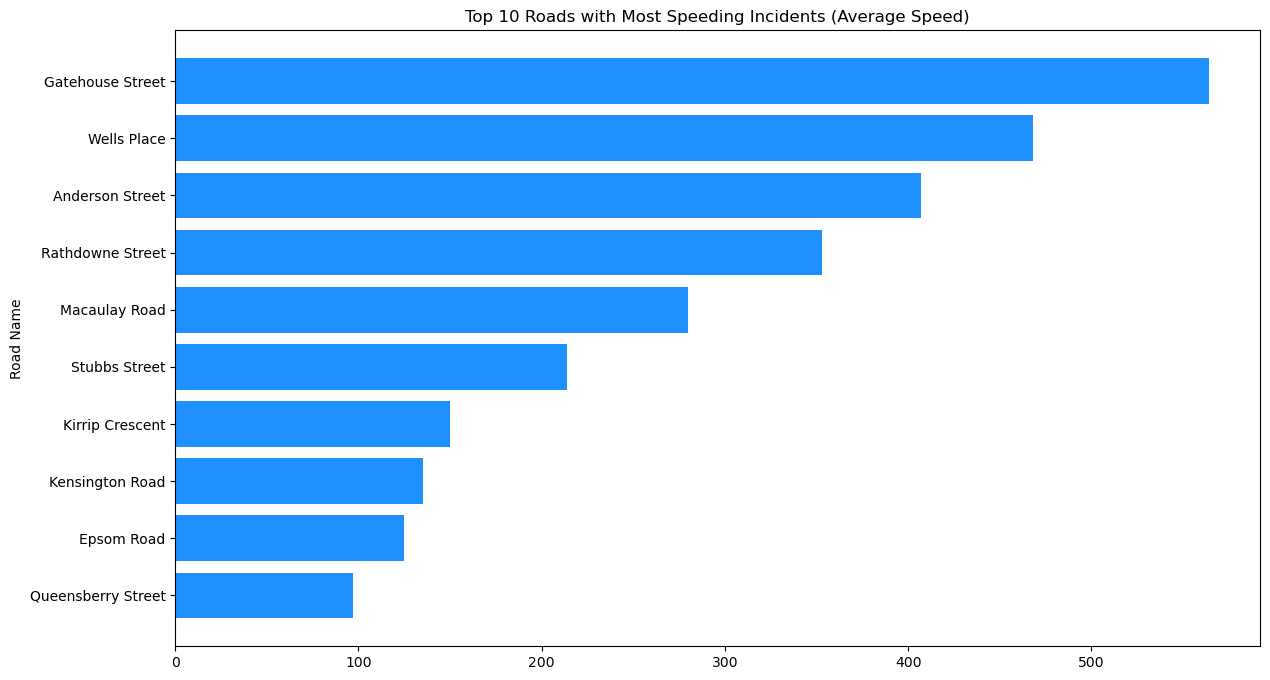

In [233]:
top_10_speeding_roads = speeding_by_road_name_avg_sorted.head(10)

# Plotting the data
plt.figure(figsize=(14, 8))
plt.barh(top_10_speeding_roads['road_name'], top_10_speeding_roads['Speeding_Incident_Avg_Speed'], color='#1E90FF')  
plt.ylabel('Road Name')
plt.title('Top 10 Roads with Most Speeding Incidents (Average Speed)')
plt.gca().invert_yaxis()  # Highest value on top
plt.show()

In [235]:

# Group by suburb to see where most speeding incidents happen based on average speed
speeding_by_suburb_avg = traffic_data.groupby('suburb')['Speeding_Incident_Avg_Speed'].sum().reset_index()

# Sort to find the suburbs with the most speeding incidents based on average speed
speeding_by_suburb_avg_sorted = speeding_by_suburb_avg.sort_values(by='Speeding_Incident_Avg_Speed', ascending=False)

# Display the sorted data
speeding_by_suburb_avg_sorted

,suburb,Speeding_Incident_Avg_Speed
7,Parkville,881
6,North Melbourne,519
4,Kensington,506
9,Southbank,468
8,South Yarra,427
0,Carlton,369
10,West Melbourne,17
3,East Melbourne,8
2,Docklands,4
1,Carlton North,0


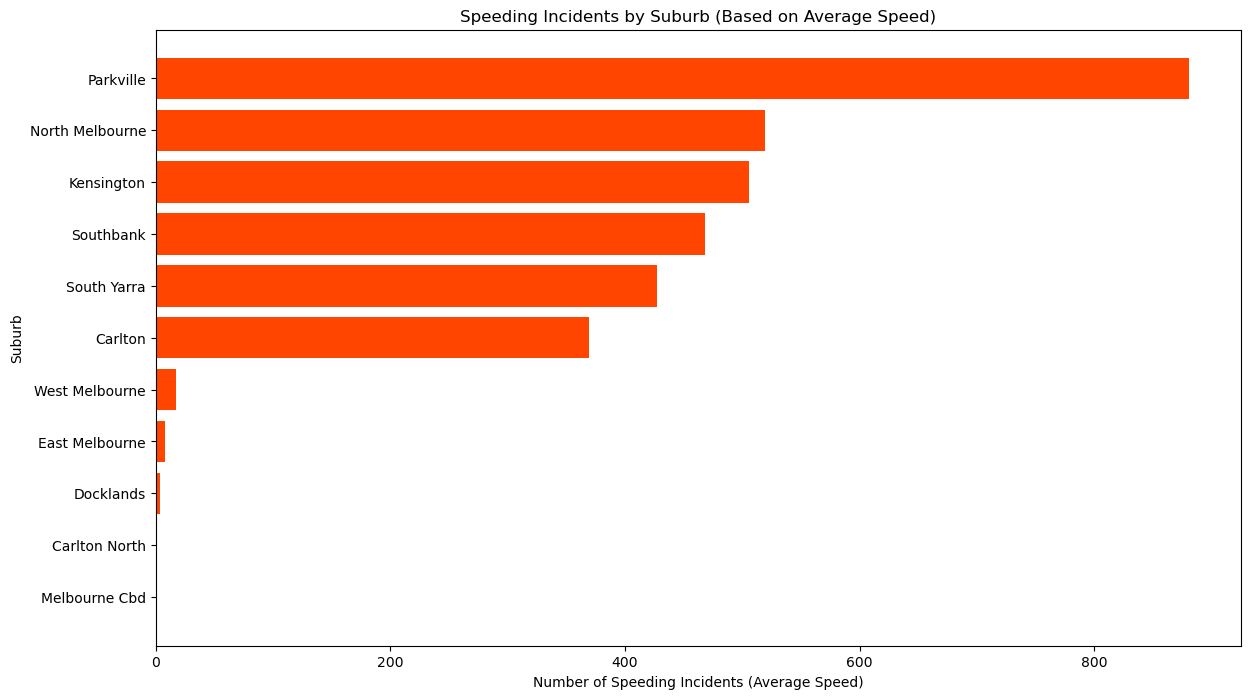

In [237]:
# Plotting the data
plt.figure(figsize=(14, 8))
plt.barh(speeding_by_suburb_avg_sorted['suburb'], speeding_by_suburb_avg_sorted['Speeding_Incident_Avg_Speed'], color='#FF4500')  # Tomato Red color
plt.xlabel('Number of Speeding Incidents (Average Speed)')
plt.ylabel('Suburb')
plt.title('Speeding Incidents by Suburb (Based on Average Speed)')
plt.gca().invert_yaxis()  # Highest value on top
plt.show()

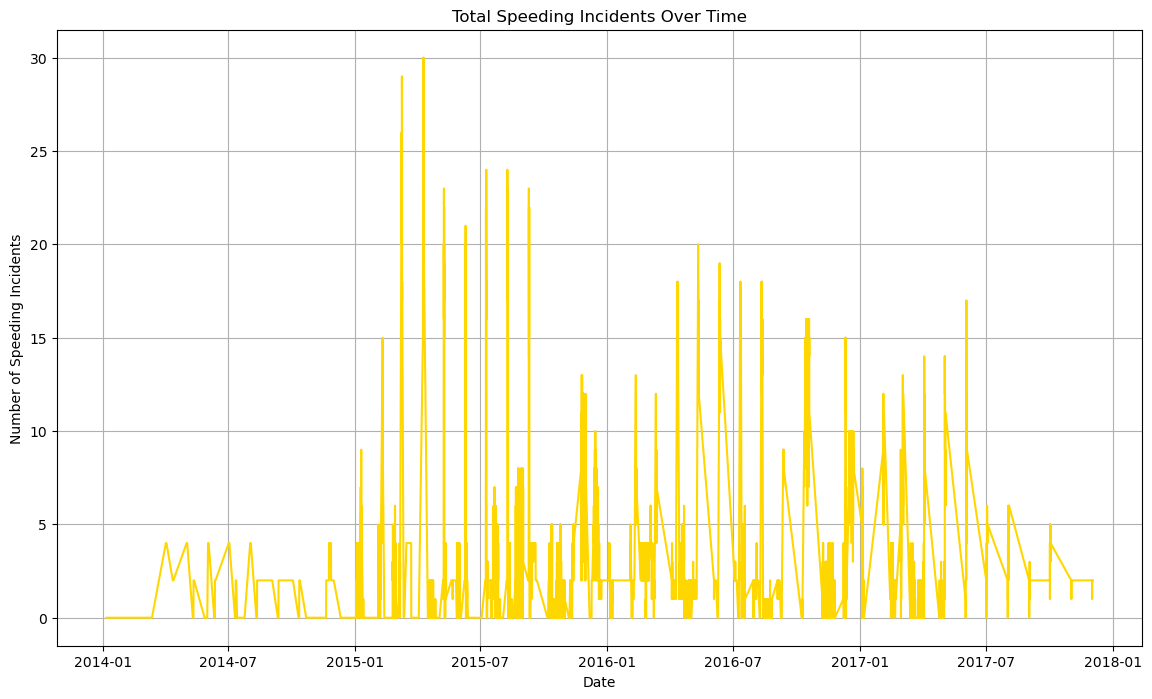

In [239]:
speeding_over_time = traffic_data.groupby(traffic_data['datetime'])['Speeding_Incident'].sum().reset_index()
# Plotting the data
plt.figure(figsize=(14, 8))
plt.plot(speeding_over_time['datetime'], speeding_over_time['Speeding_Incident'], color='#FFD700')  # Gold color
plt.xlabel('Date')
plt.ylabel('Number of Speeding Incidents')
plt.title('Total Speeding Incidents Over Time')
plt.grid(True)
plt.show()


In [249]:
# Group by day of the week
speeding_by_day_of_week = traffic_data.groupby('day_of_week')['Speeding_Incident'].sum().reset_index()
# Define the correct order for days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
speeding_by_day_of_week = speeding_by_day_of_week.sort_values('day_of_week')
speeding_by_day_of_week['day_of_week'] = pd.Categorical(speeding_by_day_of_week['day_of_week'], categories=days_order, ordered=True)

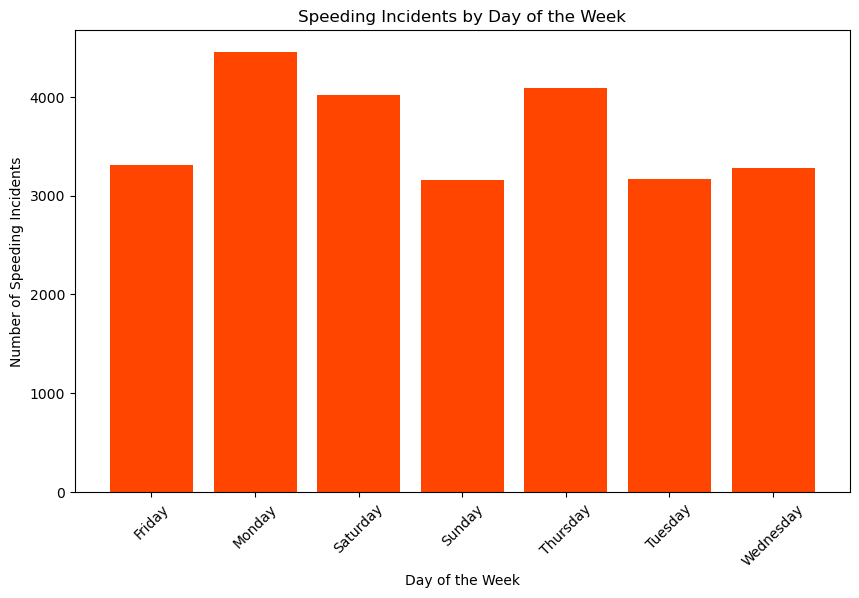

In [251]:
# Plot by day of the week
plt.figure(figsize=(10, 6))
plt.bar(speeding_by_day_of_week['day_of_week'], speeding_by_day_of_week['Speeding_Incident'], color='#FF4500')  # Orange Red
plt.xlabel('Day of the Week')
plt.ylabel('Number of Speeding Incidents')
plt.title('Speeding Incidents by Day of the Week')
plt.xticks(rotation=45)
plt.show()

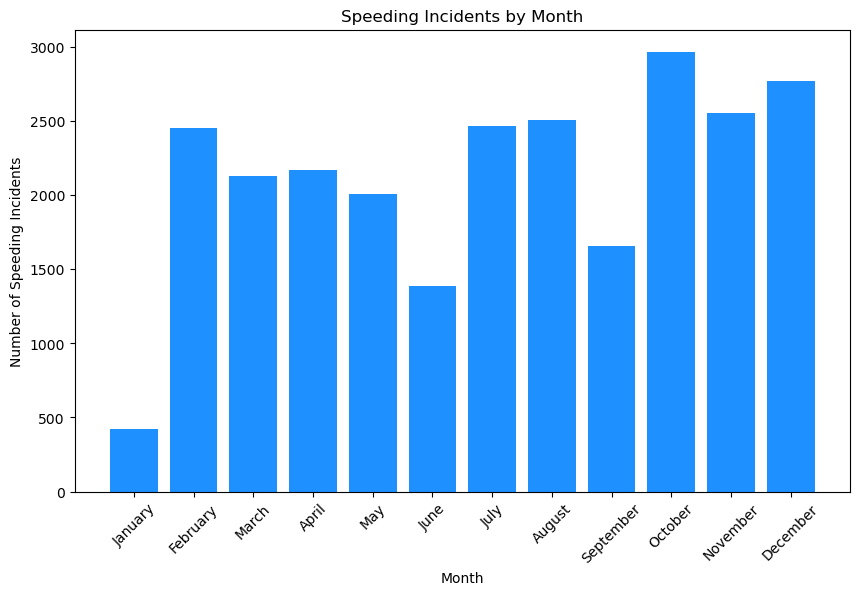

In [247]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by month name (regardless of the year)
traffic_data['month_name'] = traffic_data['datetime'].dt.month_name()  # Ensure 'month_name' is correctly extracted
speeding_by_month = traffic_data.groupby('month_name')['Speeding_Incident'].sum().reset_index()

# Define the correct order for months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']

# Assign the correct order to the 'month_name' column
speeding_by_month['month_name'] = pd.Categorical(speeding_by_month['month_name'], categories=months_order, ordered=True)

# Sort the DataFrame by month_name
speeding_by_month = speeding_by_month.sort_values('month_name')

# Plot by month name
plt.figure(figsize=(10, 6))
plt.bar(speeding_by_month['month_name'], speeding_by_month['Speeding_Incident'], color='#1E90FF')  # Dodger Blue
plt.xlabel('Month')
plt.ylabel('Number of Speeding Incidents')
plt.title('Speeding Incidents by Month')
plt.xticks(rotation=45)
plt.show()


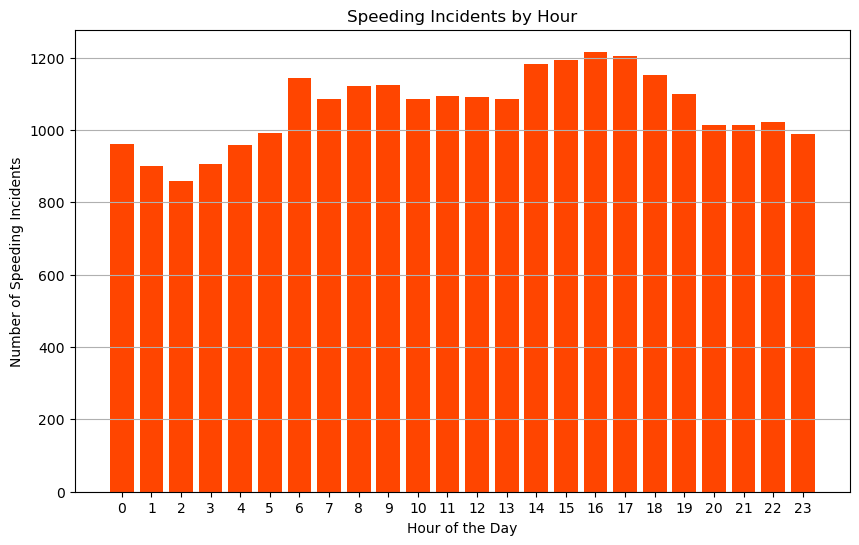

In [96]:

# Group by hour to calculate the number of speeding incidents per hour
speeding_by_hour = traffic_data.groupby('hour')['Speeding_Incident'].sum().reset_index()

# Plot the number of speeding incidents by hour
plt.figure(figsize=(10, 6))
plt.bar(speeding_by_hour['hour'], speeding_by_hour['Speeding_Incident'], color='#FF4500')  # Orange Red
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Speeding Incidents')
plt.title('Speeding Incidents by Hour')
plt.xticks(range(0, 24))  # Ensures that all hours (0-23) are shown
plt.grid(axis='y')
plt.show()

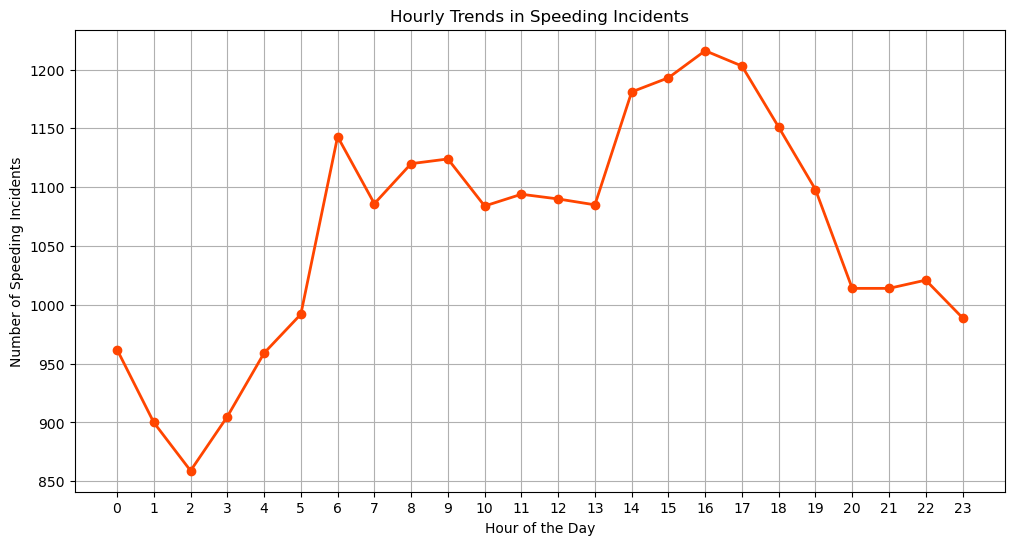

In [98]:
# Plot the number of speeding incidents by hour using a line plot
plt.figure(figsize=(12, 6))
plt.plot(speeding_by_hour['hour'], speeding_by_hour['Speeding_Incident'], marker='o', color='#FF4500', linestyle='-', linewidth=2)  # Orange Red line
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Speeding Incidents')
plt.title('Hourly Trends in Speeding Incidents')
plt.xticks(range(0, 24))  # Ensures that all hours (0-23) are shown
plt.grid(True)
plt.show()

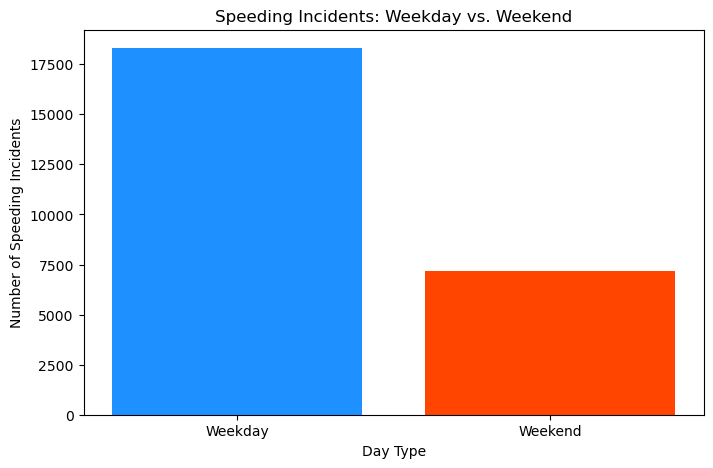

In [100]:

# Extract the day of the week from the date
traffic_data['day_of_week'] = traffic_data['datetime'].dt.day_name()

# Define a new column to categorize days into 'Weekday' and 'Weekend'
traffic_data['day_type'] = traffic_data['day_of_week'].apply(lambda x: 'Weekday' if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'Weekend')

# Group by 'day_type' to calculate the number of speeding incidents for weekdays and weekends
speeding_by_day_type = traffic_data.groupby('day_type')['Speeding_Incident'].sum().reset_index()

# Plot the number of speeding incidents by day type
plt.figure(figsize=(8, 5))
plt.bar(speeding_by_day_type['day_type'], speeding_by_day_type['Speeding_Incident'], color=['#1E90FF', '#FF4500'])  # Blue for Weekday, Orange Red for Weekend
plt.xlabel('Day Type')
plt.ylabel('Number of Speeding Incidents')
plt.title('Speeding Incidents: Weekday vs. Weekend')
plt.show()


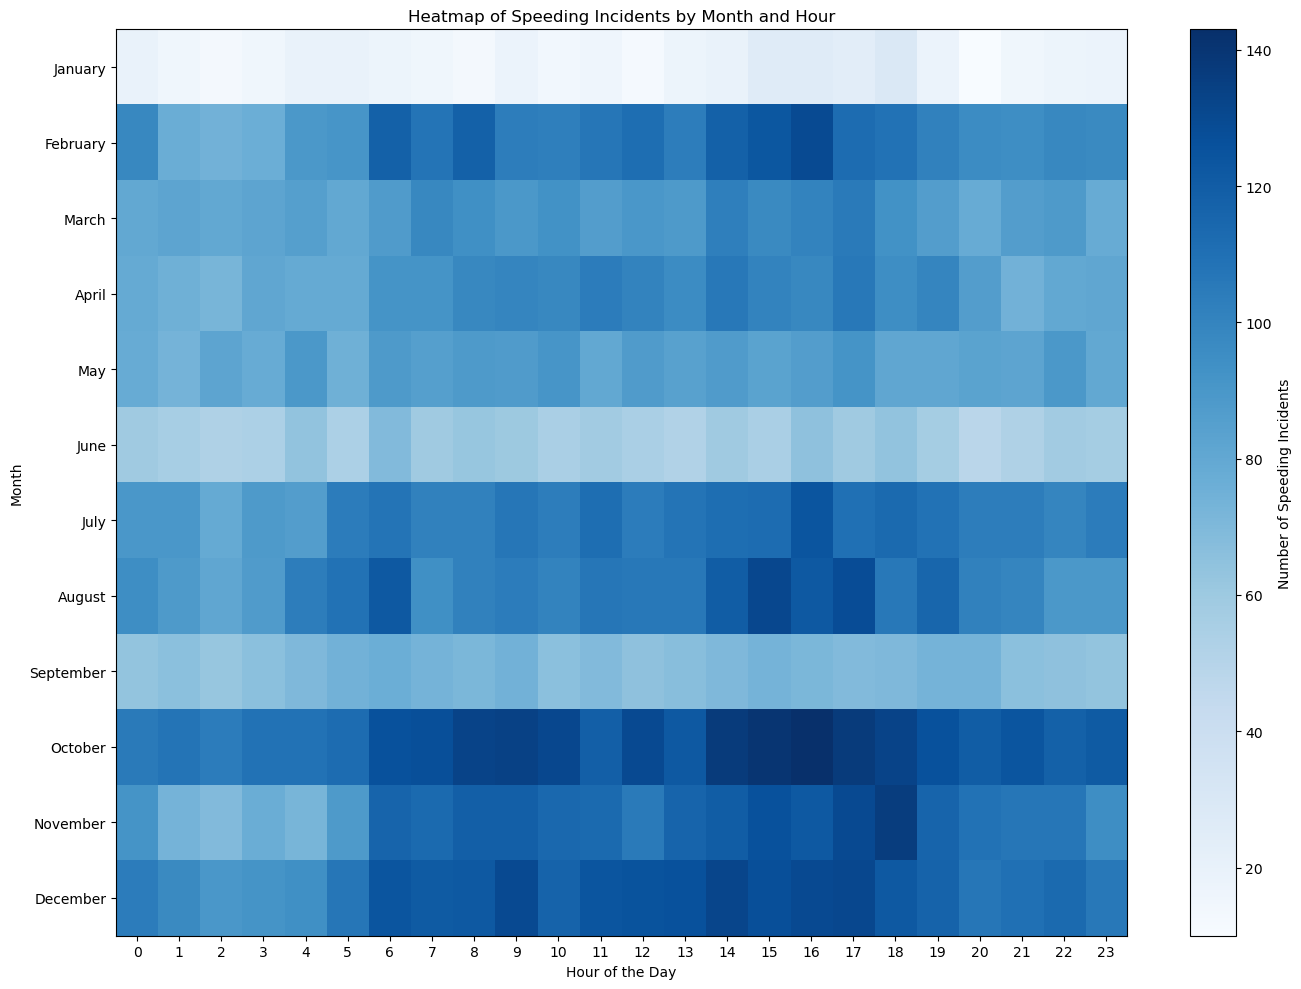

In [102]:
# Extract Month from the date
traffic_data['month'] = traffic_data['datetime'].dt.month_name()

# Define the order for months
months_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Create a pivot table with Months as rows and Hours as columns
speeding_pivot_month_hour = traffic_data.pivot_table(
    index='month',
    columns='hour',
    values='Speeding_Incident',
    aggfunc='sum',
    fill_value=0
)

# Reorder the pivot table to match the defined months order
speeding_pivot_month_hour = speeding_pivot_month_hour.reindex(months_order)

# Create the heatmap
plt.figure(figsize=(14, 10))
heatmap_month_hour = plt.imshow(speeding_pivot_month_hour, aspect='auto', cmap='Blues')

# Add colorbar
cbar = plt.colorbar(heatmap_month_hour)
cbar.set_label('Number of Speeding Incidents')

# Set axis labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Month')
plt.title('Heatmap of Speeding Incidents by Month and Hour')

# Set x-ticks and y-ticks
plt.xticks(ticks=np.arange(0, 24), labels=np.arange(0, 24))
plt.yticks(ticks=np.arange(0, 12), labels=months_order)

# Improve layout
plt.tight_layout()

# Display the heatmap
plt.show()


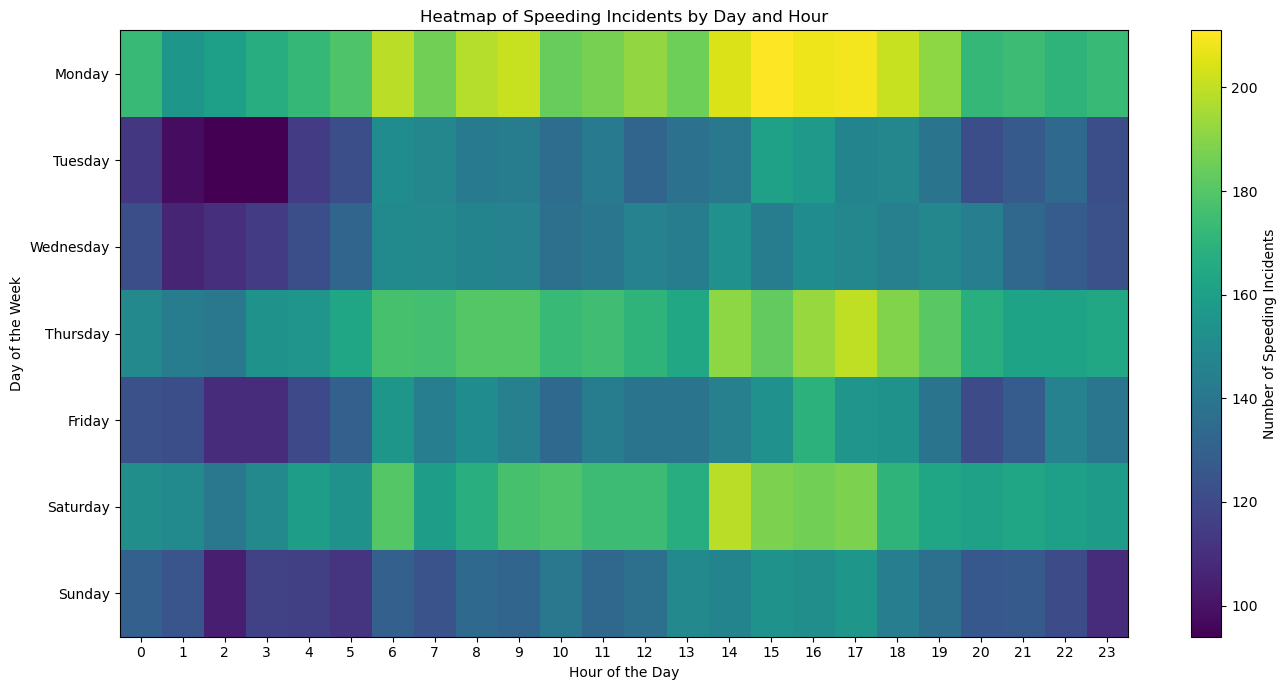

In [104]:
# Create a pivot table with Days as rows and Hours as columns
speeding_pivot = traffic_data.pivot_table(
    index='day_of_week',
    columns='hour',
    values='Speeding_Incident',
    aggfunc='sum',
    fill_value=0
)

# Reorder the pivot table to match the defined days order
speeding_pivot = speeding_pivot.reindex(days_order)

# Create the heatmap
plt.figure(figsize=(14, 7))
heatmap = plt.imshow(speeding_pivot, aspect='auto', cmap='viridis')

# Add colorbar
cbar = plt.colorbar(heatmap)
cbar.set_label('Number of Speeding Incidents')

# Set axis labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.title('Heatmap of Speeding Incidents by Day and Hour')

# Set x-ticks and y-ticks
plt.xticks(ticks=np.arange(0, 24), labels=np.arange(0, 24))
plt.yticks(ticks=np.arange(0, 7), labels=days_order)

# Improve layout
plt.tight_layout()

# Display the heatmap
plt.show()


In [106]:
traffic_data['month'] = traffic_data['datetime'].dt.month
# Define a function to categorize the season based on the month
def categorize_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    elif month in [9, 10, 11]:
        return 'Spring'

# Apply the function to create a 'season' column
traffic_data['season'] = traffic_data['month'].apply(categorize_season)

In [108]:
# Group by season to calculate the number of speeding incidents
speeding_by_season = traffic_data.groupby('season')['Speeding_Incident'].sum().reset_index()

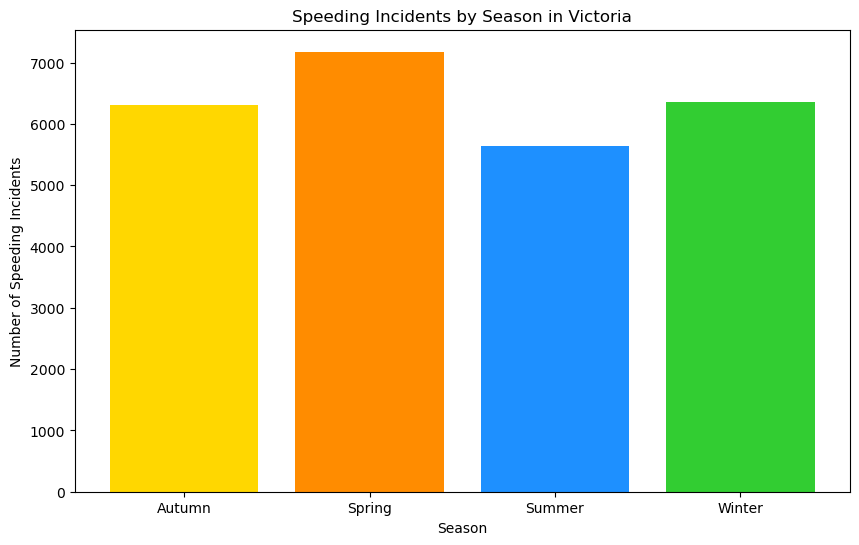

In [110]:
# Plot the number of speeding incidents by season
plt.figure(figsize=(10, 6))
plt.bar(speeding_by_season['season'], speeding_by_season['Speeding_Incident'], color=['#FFD700', '#FF8C00', '#1E90FF', '#32CD32'])  # Gold for Summer, Dark Orange for Autumn, Dodger Blue for Winter, Lime Green for Spring
plt.xlabel('Season')
plt.ylabel('Number of Speeding Incidents')
plt.title('Speeding Incidents by Season in Victoria')
plt.show()

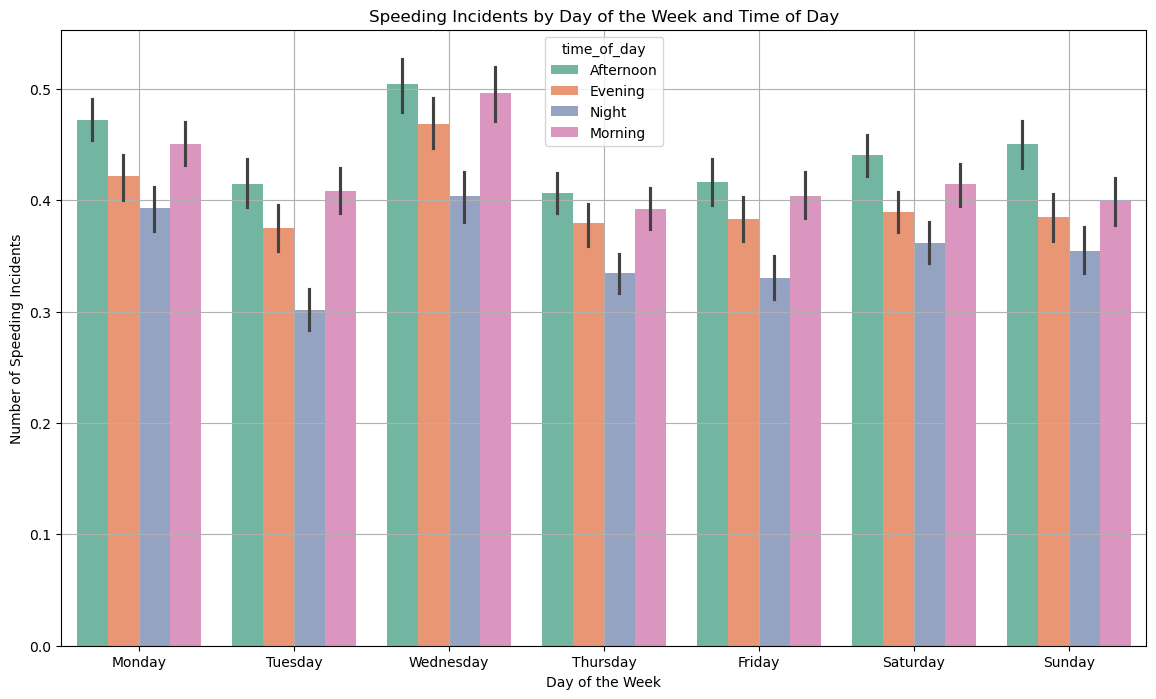

In [112]:
# Categorize the time of day
def time_of_day(hour):
    if hour < 6:
        return 'Night'
    elif hour < 12:
        return 'Morning'
    elif hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

traffic_data['time_of_day'] = traffic_data['hour'].apply(time_of_day)

plt.figure(figsize=(14, 8))
sns.barplot(x='day_of_week', y='Speeding_Incident', hue='time_of_day', data=traffic_data, palette='Set2', order=days_order)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Speeding Incidents')
plt.title('Speeding Incidents by Day of the Week and Time of Day')
plt.grid(True)
plt.show()


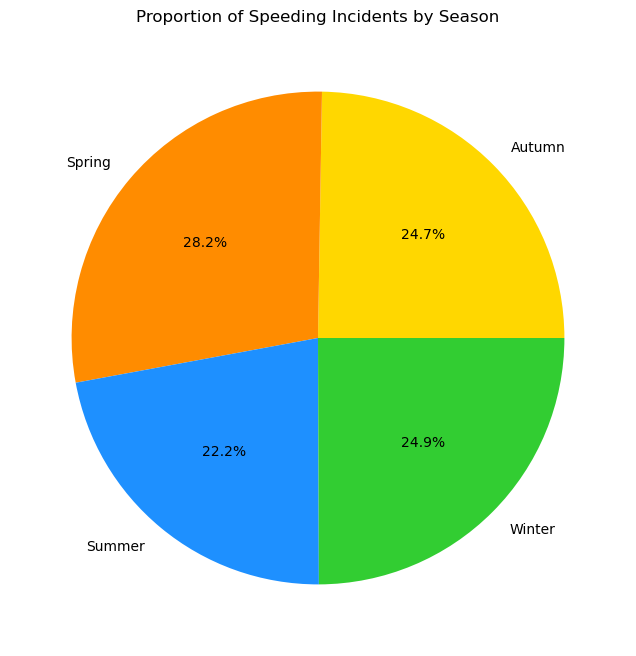

In [114]:
speeding_by_season = traffic_data.groupby('season')['Speeding_Incident'].sum()

plt.figure(figsize=(8, 8))
speeding_by_season.plot.pie(autopct='%1.1f%%', colors=['#FFD700', '#FF8C00', '#1E90FF', '#32CD32'])
plt.ylabel('')  # Hide the y-label
plt.title('Proportion of Speeding Incidents by Season')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_28424\1704569364.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='day_of_week', y='Speeding_Incident', data=traffic_data, order=days_order, palette='Set1')


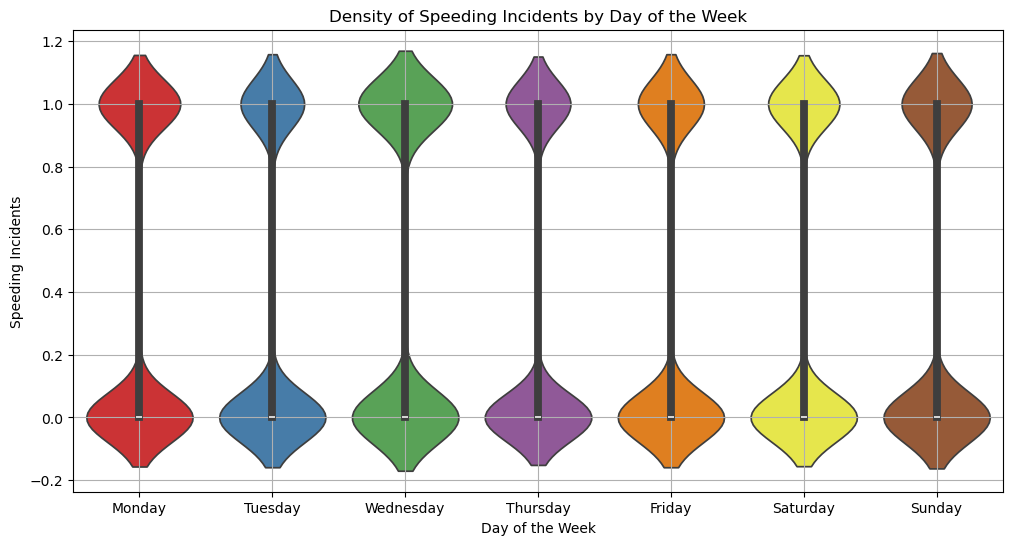

In [116]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='day_of_week', y='Speeding_Incident', data=traffic_data, order=days_order, palette='Set1')
plt.xlabel('Day of the Week')
plt.ylabel('Speeding Incidents')
plt.title('Density of Speeding Incidents by Day of the Week')
plt.grid(True)
plt.show()


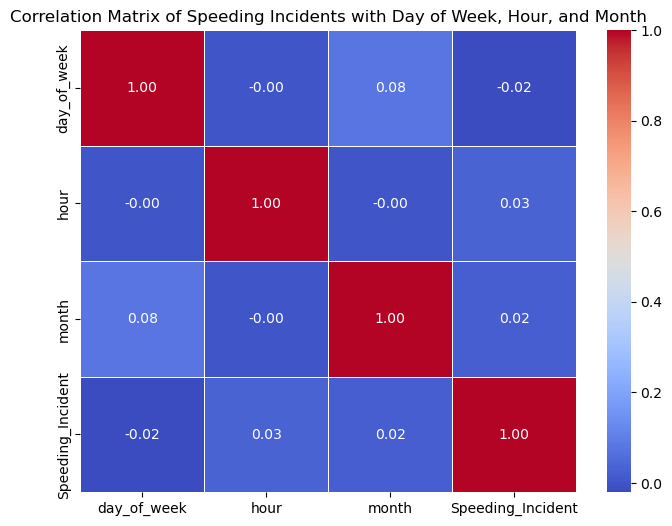

In [118]:
traffic_data['day_of_week'] = traffic_data['datetime'].dt.dayofweek  # Monday=0, Sunday=6
traffic_data['hour'] = traffic_data['datetime'].dt.hour
traffic_data['month'] = traffic_data['datetime'].dt.month
# Create a DataFrame with the relevant columns
corr_data = traffic_data[['day_of_week', 'hour', 'month', 'Speeding_Incident']]

# Calculate the correlation matrix
correlation_matrix = corr_data.corr()
# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Speeding Incidents with Day of Week, Hour, and Month')
plt.show()

In [120]:
# Assuming 'traffic_data' has columns for 'road_segment', 'Total_Traffic_Volume', and 'Speeding_Incident'

# Aggregate the total traffic volume and speeding incidents by road segment
road_segment_analysis = traffic_data.groupby('road_name').agg({
    'Total_Traffic_Volume': 'sum',
    'Speeding_Incident': 'sum'
}).reset_index()


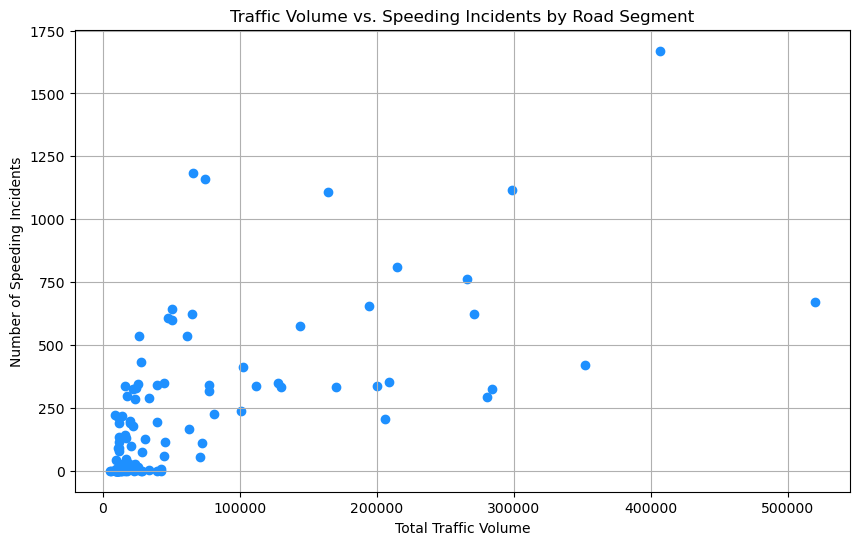

In [122]:
# Plot Traffic Volume vs. Speeding Incidents
plt.figure(figsize=(10, 6))
plt.scatter(road_segment_analysis['Total_Traffic_Volume'], road_segment_analysis['Speeding_Incident'], color='#1E90FF')
plt.xlabel('Total Traffic Volume')
plt.ylabel('Number of Speeding Incidents')
plt.title('Traffic Volume vs. Speeding Incidents by Road Segment')
plt.grid(True)
plt.show()

In [124]:
# Define thresholds for high traffic volume and high speeding incidents
high_volume_threshold = road_segment_analysis['Total_Traffic_Volume'].quantile(0.75)  # Top 25% traffic volume
high_speeding_threshold = road_segment_analysis['Speeding_Incident'].quantile(0.75)  # Top 25% speeding incidents

# Filter for road segments that meet both criteria
high_risk_segments = road_segment_analysis[
    (road_segment_analysis['Total_Traffic_Volume'] >= high_volume_threshold) &
    (road_segment_analysis['Speeding_Incident'] >= high_speeding_threshold)
]


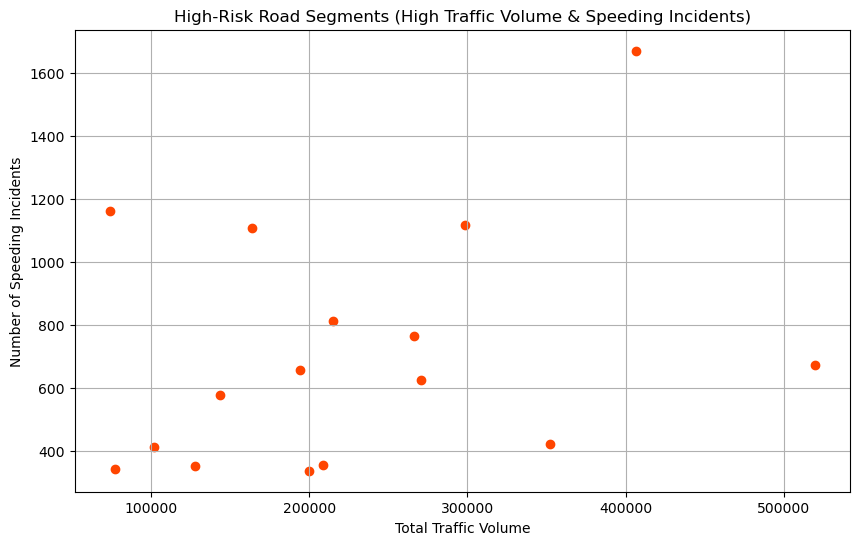

,road_name,Total_Traffic_Volume,Speeding_Incident
4,Anderson Street,164033.200573,1108
6,Arden Street,266017.153068,763
15,Bourke Street,101853.871803,412
28,Elizabeth Street,143889.097190,576
32,Flemington Road,199715.704956,336
36,Gatehouse Drive,77549.304228,340
37,Gatehouse Street,406324.977067,1670
43,Grattan Street,208474.718084,354
46,Harbour Esplanade,298323.225134,1116
47,Hawke Street,127960.258266,350


In [126]:
plt.figure(figsize=(10, 6))
plt.scatter(high_risk_segments['Total_Traffic_Volume'], high_risk_segments['Speeding_Incident'], color='#FF4500')
plt.xlabel('Total Traffic Volume')
plt.ylabel('Number of Speeding Incidents')
plt.title('High-Risk Road Segments (High Traffic Volume & Speeding Incidents)')
plt.grid(True)
plt.show()

# Display the high-risk segments
high_risk_segments


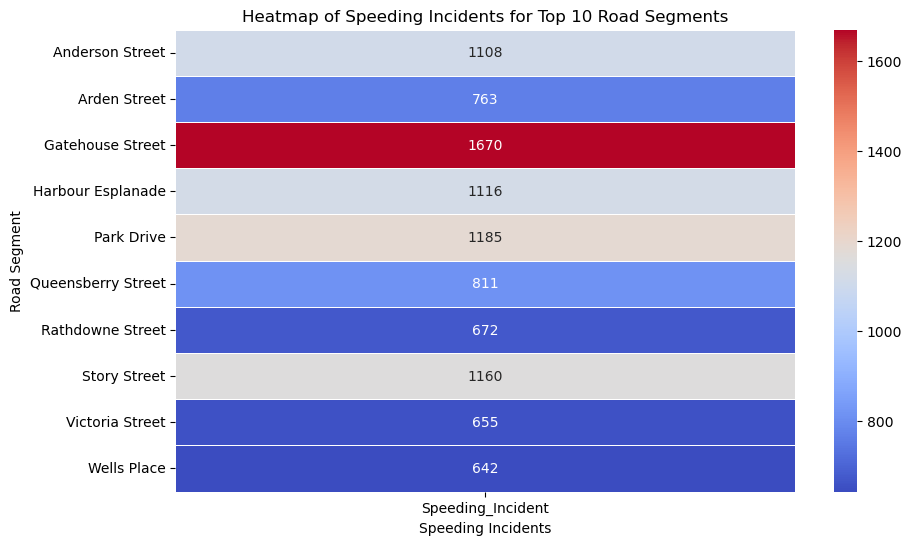

In [253]:
# Sort the road segments by the number of speeding incidents in descending order
top_10_segments = road_segment_analysis.sort_values(by='Speeding_Incident', ascending=False).head(10)
# Create a pivot table for the top 10 road segments
heatmap_data_top_10 = top_10_segments.pivot_table(
    index='road_name',  # Assuming 'road_name' is the column with road segment names
    values='Speeding_Incident', 
    aggfunc='sum'
)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_top_10, annot=True, cmap='coolwarm', linewidths=0.5, fmt='g')
plt.title('Heatmap of Speeding Incidents for Top 10 Road Segments')
plt.ylabel('Road Segment')
plt.xlabel('Speeding Incidents')
plt.show()

In [255]:
'''columns_to_drop = ['Light_Vehicles',
 'Light_Vehicles_with_Trailer',
 'Two_Axle_Trucks_Buses',
 'Three_Axle_Trucks_Buses',
 'Four_Axle_Trucks',
 'Three_Axle_Articulated_Vehicles',
 'Four_Axle_Articulated_Vehicles',
 'Five_Axle_Articulated_Vehicles',
 'Six_Axle_Articulated_Vehicles',
 'B_Double_Trucks',
 'Double_Road_Trains',
 'Triple_Road_Trains',
 'Unknown_Vehicles',
 'Motorcycles',
 'Bicycles',
 'dtupdate',
 'direction',
 'str_type', 'status_id', 'seg_descr', 'seg_id',
 'poly_area', 'gisid', 'street_id', 'seg_part', 'Geo Shape x', 
 'Geo Shape y', 'Latitude', 'Longitude', 'season', 'Speeding_Incident_Avg_Speed']
traffic_data = traffic_data.drop(columns=columns_to_drop)'''
# Display the first few rows of the updated DataFrame to confirm the columns have been dropped
print(traffic_data.head())

         road_name                    location      suburb  speed_limit  \
0  Wolseley Parade  North East Of Derby Street  Kensington           50   
1  Wolseley Parade  North East Of Derby Street  Kensington           50   
2  Wolseley Parade  North East Of Derby Street  Kensington           50   
3  Wolseley Parade  North East Of Derby Street  Kensington           50   
4  Wolseley Parade  North East Of Derby Street  Kensington           50   

  direction  Light_Vehicles  Light_Vehicles_with_Trailer  \
0         W       24.000000                     0.386506   
1         W       42.000000                     0.386506   
2         W       33.000000                     0.386506   
3         W        3.000000                     0.386506   
4         W       86.177384                     0.386506   

   Two_Axle_Trucks_Buses  Three_Axle_Trucks_Buses  Four_Axle_Trucks  ...  \
0               4.093996                 0.608382          0.260623  ...   
1               4.093996            

In [259]:
data_path = r"C:\Users\USER\Capstone A\traffic_volume_analysis_new.csv";
traffic_data.to_csv(data_path, index=False)